# WHAT MAKES US HAPPY?

##### MGT-502: Data science and machine learning
## Miners of Happiness

- Maria Velikikh ([@mivelikikh](https://github.com/mivelikikh))
- Emilija Vukasinovic ([@emavuk](https://github.com/emavuk))
- Paula Ramirez Ortega ([@Pramirezortega](https://github.com/Pramirezortega))


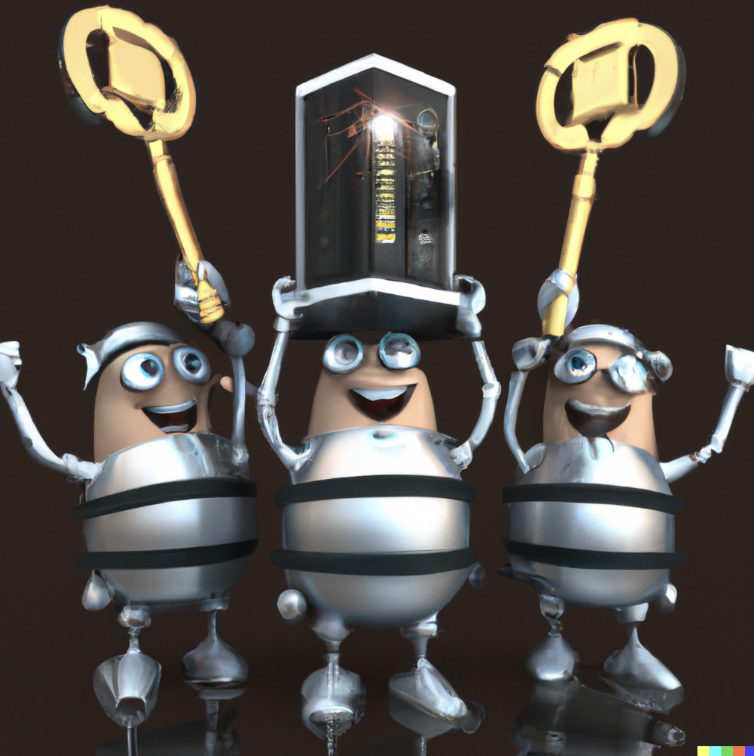

Picture generated with OpenAI's Dall-E 2 (https://openai.com/product/dall-e-2)

# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# loading bar
from tqdm.notebook import tqdm

# ML
    ## Preprocessing
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
    ## Models
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Clustering
#from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# custom functions
from functions import plot_scatterplot, plot_boxplot
from functions import plot_histogram, calculate_skewness
from functions import get_grid_search_regressor, get_results, get_best_model, get_best_models

# Introduction

Throughout the ages, humanity has been captivated with the pursuit of happiness, and the quest to unravel the source of happiness has intrigued ancient philosophers as much as modern-day researchers. Despite centuries of efforts, the “holy grail” or secret formula to happiness has not yet been found. Until now?

Following the steps of many brave souls who already embarked on this quest, in our project, we explored the factors that influence happiness trying to find the perfect formula to predict happiness. By diving into literature research, to understand where the common human knowledge stands on the topic up until discovering current data on happiness. Join us on this captivating journey as we explore the multifaceted nature of happiness, unravel its elusive mysteries, and seek to inspire a happier and more fulfilling world.

## Literature research

In ancient Greece, many philosophers were teaching “happiness” to be either virtue or pleasure. For Plato, happiness and self-fulfillment came from a **life committed to knowledge and virtue**. His student Aristotle believed that happiness (eudaimonia) is the ultimate goal in life achieved by living a virtuous **life, with moral and ethical excellence**. Epicurus, on the other hand, argued happiness (ataraxia) can be achieved through the **pursuit of pleasure and the avoidance of pain**. Later on, Kant defined happiness through **living in accordance with reason and morality**. Whereas, Nietzsche argued that true fulfillment and meaning come **from embracing life's challenges and struggles**, rather than seeking comfort and pleasure. 

More recent research has focused on finding concrete factors that influence happiness trying to isolate and quantify them. For a long time, the well-being of countries was calculated by the **gross domestic product (GDP)**, indicating the economic growth, standard of living, and international comparison of countries.

Introduced in 1972, the [Bhutan National Happiness](https://www.gnhcentrebhutan.org/gnh-happiness-index/) concept provides an alternative approach to measuring the progress and well-being of a nation (Bhutan), contrasting  the traditional reliance on GDP alone. This gives it a more holistic view on well-being as it includes 33 indicators over 4 pillars of good governance, sustainable socio-economic development, preservation and promotion of culture, and environmental conservation.

More recently, since 2012 the Sustainable Development Solutions Network publishes the [World Happiness index](https://worldhappiness.report/), which ranks the happiness of countries based on a combination of economic, social, and ecological factors. These factors include: GDP per capita, social support (emotional and practical) through social networks, family, and friends, healthy life expectancy, freedom to make life choices, generosity (charitable giving and helping among individuals), perceptions of corruption, and positive affect (level of positive emotions).

Up to date, happiness has been researched from various angles and perspectives spanning over the social, economic, and ecological sphere. It has been researched in the area of subjective wellbeing such as psychological perspectives, social relationships, cultural and cross-cultural perspectives, health, socioeconomic, political, and environmental factors. There have been various studies discovering how large-scale events, such as the coronavirus impacted well-being and happiness. A study in China found out that emotional well-being dropped by 74% ([Source](https://www.sciencedirect.com/science/article/pii/S0165178120309902)). But also how aggregate happiness is influenced by alcohol consumption intensity ([Source](https://journals.sagepub.com/doi/abs/10.1177/1757913916669538?journalCode=rshi)). Even other studies have found that people in cities are less happy ([Source](https://journals.sagepub.com/doi/pdf/10.1177/0042098016645470?casa_token=ERb-3lofR6QAAAAA:u9PWYSfGaXp4haDOkT4HTDswNtPCyj35DU0Kfq8wkKaWw5JdQ7VckL7umWebnl9y5DvKFWKUolqGsjc)). 

The importance of this topic shows also the fact that it has been commercialized and various business models built around it, as there are various tools on the market. For example, the [PERMA Profiler](https://www.peggykern.org/questionnaires.html), is a happiness predictor developed by Martin Seligman and his team at the University of Pennsylvania. The tool is designed to assess people's well-being based on five key elements: Positive emotion, Engagement, Relationships, Meaning, and Accomplishment (PERMA). There are also several apps and websites that offer happiness predictors or related tools. For example, [Happify](https://www.happify.com/) is an app that uses science-based techniques and activities to help users improve their emotional well-being and happiness levels. The app offers personalized happiness scores and provides users with tools to help them manage stress, build resilience, and cultivate positive emotions.

### SDGs & Happiness

Moreover, it is important to talk about happiness, as it contributes to several Sustainable Development Goals (SDGs) by addressing various aspects of well-being and societal progress. Poverty reduction (Goal 1), economic factors (such as income inequality), access to basic needs like food and water (Goals 2 and 6), and good health and well-being (Goal 3) are interconnected with happiness. Education and lifelong learning opportunities (Goal 4) are crucial for fostering happiness. Equality and inclusion (Goal 5 and 10) play significant roles, promoting equal rights, opportunities, and eliminating discrimination. Additionally, happiness is linked to peace, justice, and strong institutions (Goal 16), which ensure safety, access to justice, and good governance. Overall, happiness contributes to multiple SDGs, highlighting its importance in creating a sustainable and fulfilling world.

# Contents

1. [Data Description](#Data-Description)
2. [Data Preprocessing](#Data-Preprocessing)
    - [NaN-Cleaning](#NaN-Cleaning)
    - [Outliers detection and Normalization](#Outliers-detection-and-Normalization)
    - [Duplicate data](#Duplicate-data)
    - [Spatial distribution](#Spatial-distribution)
3. [Metrics Analysis](#Metrics-Analysis)
4. [Clustering Analysis](#Clustering-Analysis)
    - [KMeans and Hierarchical Clustering](#KMeans-and-Hierarchical-Clustering)
5. [Prediction Models](#Prediction-Models)
    - [Preprocessing](#Preprocessing)
    - [Custom Functions](#Custom-Functions)
    - [Scaling Methods](#Scaling-Methods)
    - [**Full Sample Approach**](#Full-Sample-Approach)
        - [ElasticNet](#1.1.-ElasticNet)
        - [Ridge](#1.2.-Ridge)
        - [Lasso](#1.3.-Lasso)
        - [kNN](#1.4.-kNN)
        - [Decision Tree](#1.5.-Decision-Tree)
        - [Random Forest](#1.6.-Random-Forest)
        - [Support Vector Regression](#1.7.-Support-Vector-Regression)
    - [Full Sample Approach Models Rating](#Full-Sample-Approach-Models-Rating)
    - [**Subset Approach**](#Subset-Approach)
        - [ElasticNet](#2.1.-ElasticNet)
        - [Ridge](#2.2.-Ridge)
        - [Lasso](#2.3.-Lasso)
        - [kNN](#2.4.-kNN)
        - [Decision Tree](#2.5.-Decision-Tree)
        - [Random Forest](#2.6.-Random-Forest)
        - [Support Vector Regression](#2.7.-Support-Vector-Regression)
    - [Subset Sample Approach Models Rating](#Subset-Sample-Approach-Models-Rating)
    - [Conclusion](#Conclusion)

# Data Description

In [2]:
world_metrics_path = "./data/world_metrics.csv"
world_metrics = pd.read_csv(world_metrics_path)

In [3]:
world_metrics

country  life_expect  life_exp60  adult_mortality  infant_mort  \
0          Angola     62.63262    17.34829        237.96940     0.057900   
1         Burundi     60.09811    16.59126        290.18580     0.052420   
2           Benin     61.08568    17.20543        242.37410     0.066690   
3    Burkina Faso     60.32101    15.48575        254.60270     0.055795   
4        Botswana     66.05297    17.42258        249.24130     0.032560   
..            ...          ...         ...              ...          ...   
132   New Zealand     82.24739    25.29202         66.05728     0.003975   
133         Japan     84.16616    26.39402         50.82619     0.001980   
134      Cambodia     69.36723    17.36710        170.49700     0.027600   
135   South Korea     82.66409    25.26966         60.81405     0.002955   
136          Laos     65.79089    16.83024        192.79390     0.051895   

     age1-4mort  alcohol   bmi  basic_water  pop_mils  ...  pf_identity  \
0      0.007520  5.38006  23.3     55.08428     20.82  ...     7.500000   
1      0.006450  3.88586  21.7     60.20415      9.85  ...     5.833333   
2      0.009390  1.46034  23.5     66.32024     10.05  ...    10.000000   
3      0.008635  7.10585  22.2     48.26772     16.46  ...    10.000000   
4      0.002040  5.14197  24.3     89.40444      2.00  ...     4.250000   
..          ...      ...   ...          ...       ...  ...          ...   
132    0.000235  9.01749  28.0    100.00000      4.46  ...     9.250000   
133    0.000195  6.81588  22.7     98.97000    127.25  ...     9.250000   
134    0.001110  3.50125  22.2     76.94537     14.86  ...     8.333333   
135    0.000125  8.68600  23.8     99.67540     49.00  ...     9.250000   
136    0.003990  7.11148  22.9     79.94190      6.65  ...    10.000000   

     pf_score  ef_government  ef_legal  ef_money  ef_trade  ef_regulation  \
0    6.111324       6.496685  2.963635  5.606605  5.264754       5.518500   
1    4.414134       6.115441  3.495487  7.585471  6.110770       6.271879   
2    7.496976       6.182575  3.822761  7.013885  6.026546       6.855929   
3    7.455340       5.405462  3.687657  7.121434  6.604145       7.427554   
4    6.876334       6.702038  5.950516  9.056783  7.679525       7.769777   
..        ...            ...       ...       ...       ...            ...   
132  9.284819       6.476854  8.715280  9.455372  8.635971       9.159782   
133  8.733771       4.535268  7.586987  9.524659  7.495839       8.197000   
134  7.238448       7.897867  4.277907  9.308534  7.324052       7.061529   
135  8.766350       6.826429  6.391154  9.609132  7.569457       7.243194   
136  5.863586       7.840113  5.937201  7.335899  6.830397       6.590033   

     ef_score  hf_score  happiness_score  
0        5.17  5.640662            3.866  
1        5.92  5.167067            2.905  
2        5.98  6.738488            3.484  
3        6.05  6.752670            3.739  
4        7.43  7.153167            3.974  
..        ...       ...              ...  
132      8.49  8.887410            7.334  
133      7.47  8.101885            5.921  
134      7.17  7.204224            3.907  
135      7.53  8.148175            5.835  
136      6.91  6.386793            4.876  

[137 rows x 30 columns]

1. The dataset `world_metrics` contains information on health and life expectancy data as well as on the ecological footprint, human freedom scores, and happiness scores for 137 countries in 2016.
2. The dataset includes statistics for 29 distinct features, which are listed below along with their corresponding descriptions:

| N | feature | description |
|---|---|---|
| 1 | `country` | Country name |
| 2 | `life_expect` | Life expectancy at birth (years) |
| 3 | `life_exp60` | Life expectancy at age 60 (years) |
| 4 | `adult_mortality` | Adult (15 to 60 years) Mortality Rates (per 1000 population) |
| 5 | `infant_mort` | Death rate up to age 1 |
| 6 | `age1-4mort` | Death rate between ages 1 and 4 |
| 7 | `alcohol` | Alcohol consumption per capita (15+, in litres of pure alcohol) |
| 8 | `bmi` | Mean BMI (kg/m^2) (18+, age-standardized estimate) |
| 9 | `basic_water` | Population using at least basic drinking-water services |
| 10 | `pop_mils` | Population (millions) |
| 11 | `development_index` | Human Development Index |
| 12 | `gdp_per_capita` | Gross Domestic Product per capita (dollars) |
| 13 | `eco_footprint` | Use of ecological assets (measured in gha per person) |
| 14 | `biocapacity` | Productivity of ecological assets (measured in gha per person) |
| 15 | `deficit_or_reserve` | Biocapacity Deficit or Reserve (measured in gha per person) |
| 16 | `pf_rol` | Personal Freedom score (Rule of Law) |
| 17 | `pf_ss` | Personal Freedom score (Security and Safety) |
| 18 | `pf_movement` | Personal Freedom score (Movement) |
| 19 | `pf_religion` | Personal Freedom score (Religion) |
| 20 | `pf_expression` | Personal Freedom score (Expression and Information) |
| 21 | `pf_identity` | Personal Freedom score (Identity and Relationships) |
| 22 | `pf_score` | General Personal Freedom score |
| 23 | `ef_government` | Economic Freedom score (Size of Government) |
| 24 | `ef_legal` | Economic Freedom score (Legal System and Property Rights) |
| 25 | `ef_money` | Economic Freedom score (Access to Sound Money) |
| 26 | `ef_trade` | Economic Freedom score (Freedom to Trade Internationally) |
| 27 | `ef_regulation` | Economic Freedom score (Regulation of Credit, Labor, and Business) |
| 28 | `ef_score` | General Economic Freedom score |
| 29 | `hf_score` | General Human Freedom score |
| 30 | `happiness_score` | Ladder score (between 10 (best) and 0 (worst) possible life) |


3. All features (except for the feature "countries names") take numerical (float) values.
4. **Our question of interest: which factors have the most prominent effect on happiness levels?**
5. Main sources used:
    - Features 1 - 9 are retrieved from [WHO National Life Expectancy](https://www.kaggle.com/datasets/mmattson/who-national-life-expectancy).
    - Features 10 - 15 are retrieved from [2016 Global Ecological Footprint](https://www.kaggle.com/footprintnetwork/ecological-footprint).
    - Features 16 - 29 are retrieved from [The Human Freedom Index](https://www.kaggle.com/datasets/gsutters/the-human-freedom-index).
    - Feature 30 is retrieved from [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness).
    - More information about data sources can be found [here](https://www.kaggle.com/code/dariasvasileva/merging-world-metrics-sets/notebook).

After introducing the dataset, two questions arise:

1. Should we augment the dataset with more countries?
2. Should we augment the dataset with more years?

We leave these questioned unanswered as we want to discover the original dataset.

# Data Preprocessing

## NaN-Cleaning

In [4]:
world_metrics.isna().sum()

country               0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol               0
bmi                   0
basic_water           0
pop_mils              0
development_index     0
gdp_per_capita        0
eco_footprint         0
biocapacity           0
deficit_or_reserve    0
pf_rol                0
pf_ss                 0
pf_movement           0
pf_religion           0
pf_expression         0
pf_identity           0
pf_score              0
ef_government         0
ef_legal              0
ef_money              0
ef_trade              0
ef_regulation         0
ef_score              0
hf_score              0
happiness_score       0
dtype: int64

The initial dataset is clean. We do not have any `NaN` values.

## Outliers detection

To ensure the accuracy and reliability of our analysis, it is important to identify and address any outliers in the dataset. 

**Outliers** are data points that significantly deviate from the overall pattern or distribution of the data. 

They could have a negative impact on our analysis by skewing results or influencing statistical measures. However, it is crucial to approach outlier detection with caution, as outliers may contain valuable information or represent extreme but valid observations. Therefore, it is essential to understand the nature of these values better before deciding how to handle them.

To identify and handle outliers in the dataset, we will begin by visualizing the features through scatterplots. Before plotting, we will prepare the dataset by excluding the categorical values, specifically the `country` column.

In [5]:
world_metrics_numerical_features = world_metrics.drop(columns=["country"])

**Scatterplots** help visually represent each metric to identify outliers and potential clusters in the data.

To plot scatterplots, we will utilize a custom function called `plot_scatterplot` which enables us to create the corresponding plots using a specific dataset and other specified parameters.

**Important Note:**

Here and after we will use plenty of custom functions. All of them are defined in the separate file `functions.py`. For a more detailed understanding of the functions, please refer to the corresponding file on the GitHub page. Before running the notebook, ensure that `functions.py` is located in the same directory as the notebook.

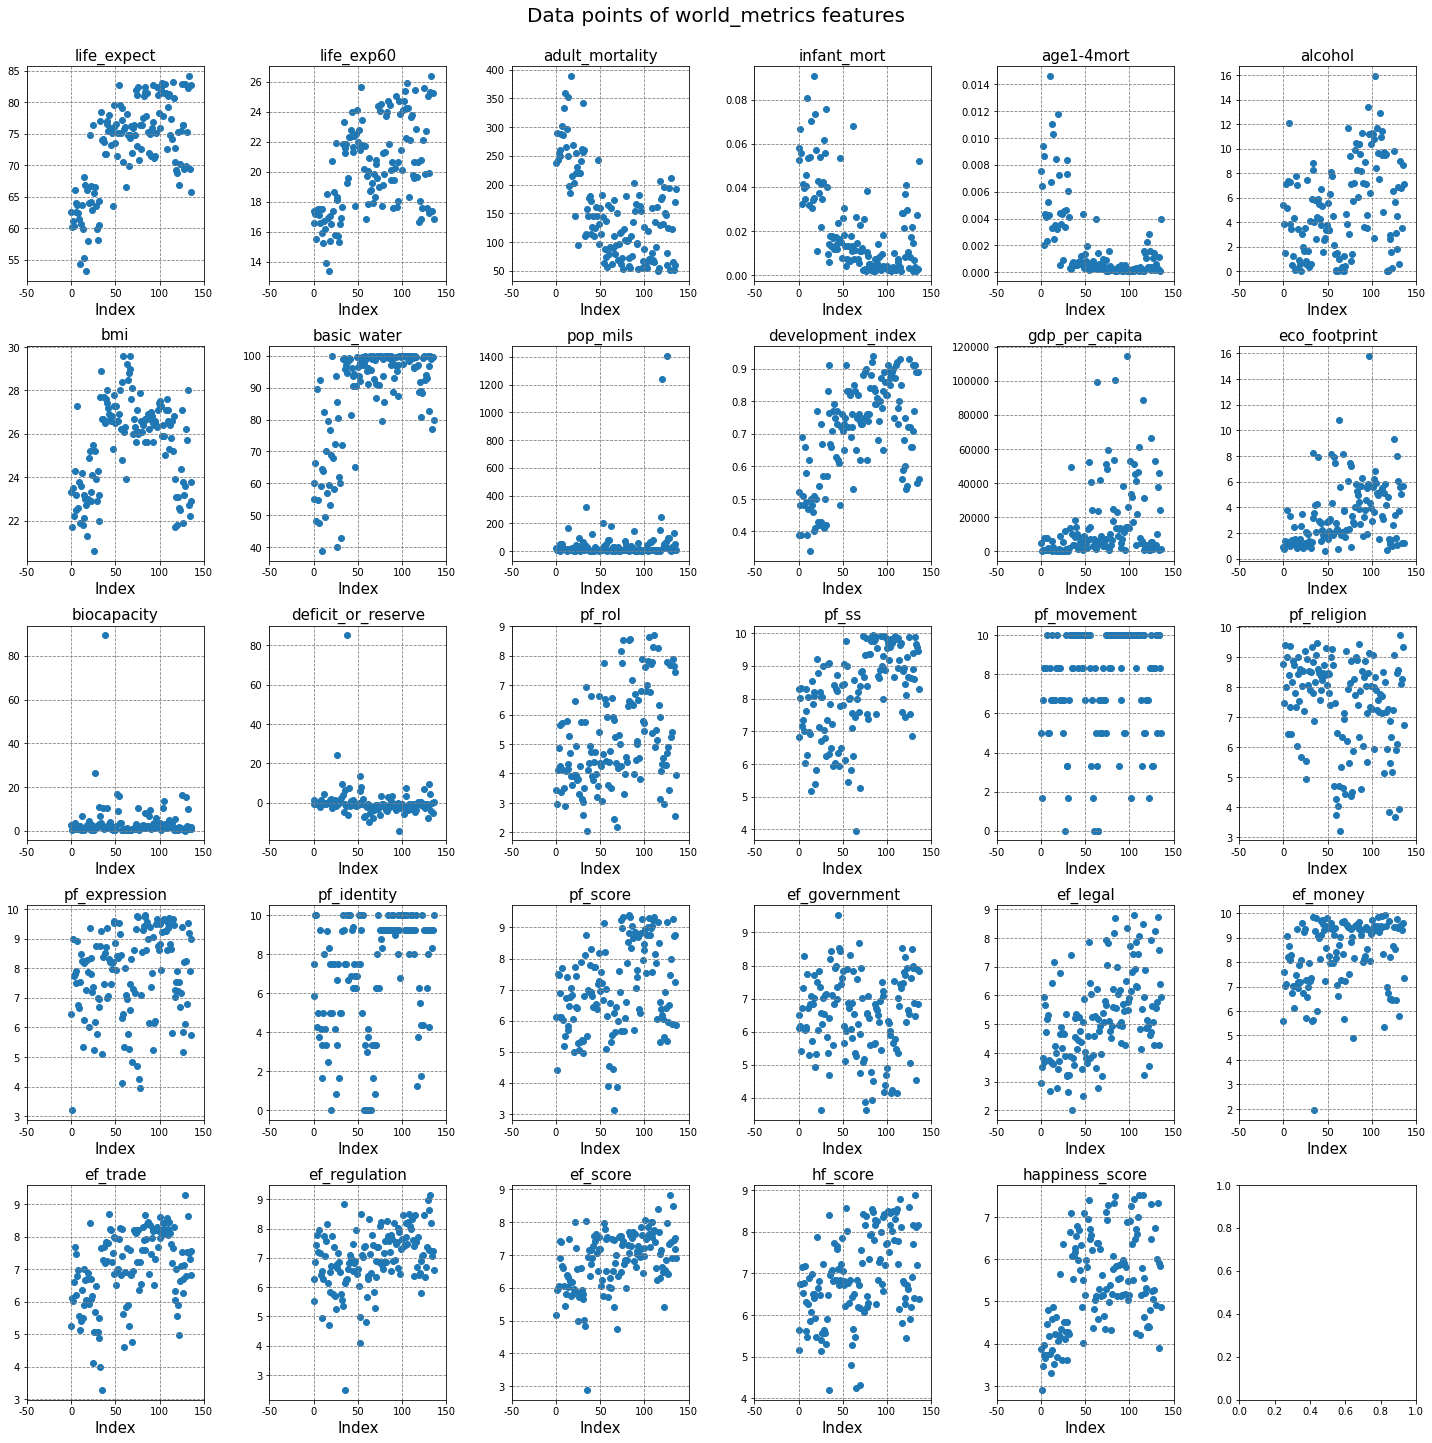

In [6]:
plot_scatterplot(dataset=world_metrics_numerical_features,
                 title="Data points of world_metrics features",
                 title_fontsize=20, ax_fontsize=15,
                 fig_width=20, fig_height=20, nrows=5, ncols=6)

Based on our observation of the scatterplots, the following metrics appear to have outliers:

- `adult_mortality`
- `infant_mort`
- `age1-4mort`
- `basic_water`
- `pop_mils`
- `gdp_per_capita`
- `eco_footprint`
- `biocapacity`
- `deficit_or_reserve`
- `pf_ss`
- `ef_money`
- `ef_regulation`
- `ef_score`

To validate whether there are outliers in *other* metrics, we can use the box plot visualization. The `plot_boxplot` function from the `functions.py` file can be used for this purpose (again, make sure that the `functions.py` file is located in the same directory as this notebook).

A box plot is perhaps an even more effective way to visualize the distribution of the data and identify the presence of outliers. Here is a brief explanation of the elements in a box plot:

- **Central box** represents the middle 50% of the data, ranging from the lower quartile (Q1) to the upper quartile (Q3) (interquartile range).
- **Orange horizontal line** inside the box represents the *median*.
- **Whiskers** (lines extending from the box) represent the range of the data outside the middle 50%.
- Outliers are data points that fall beyond the whiskers, and they are depicted as **small circles**.

By using the box plot, we can visually identify any outliers present in the dataset for each metric.

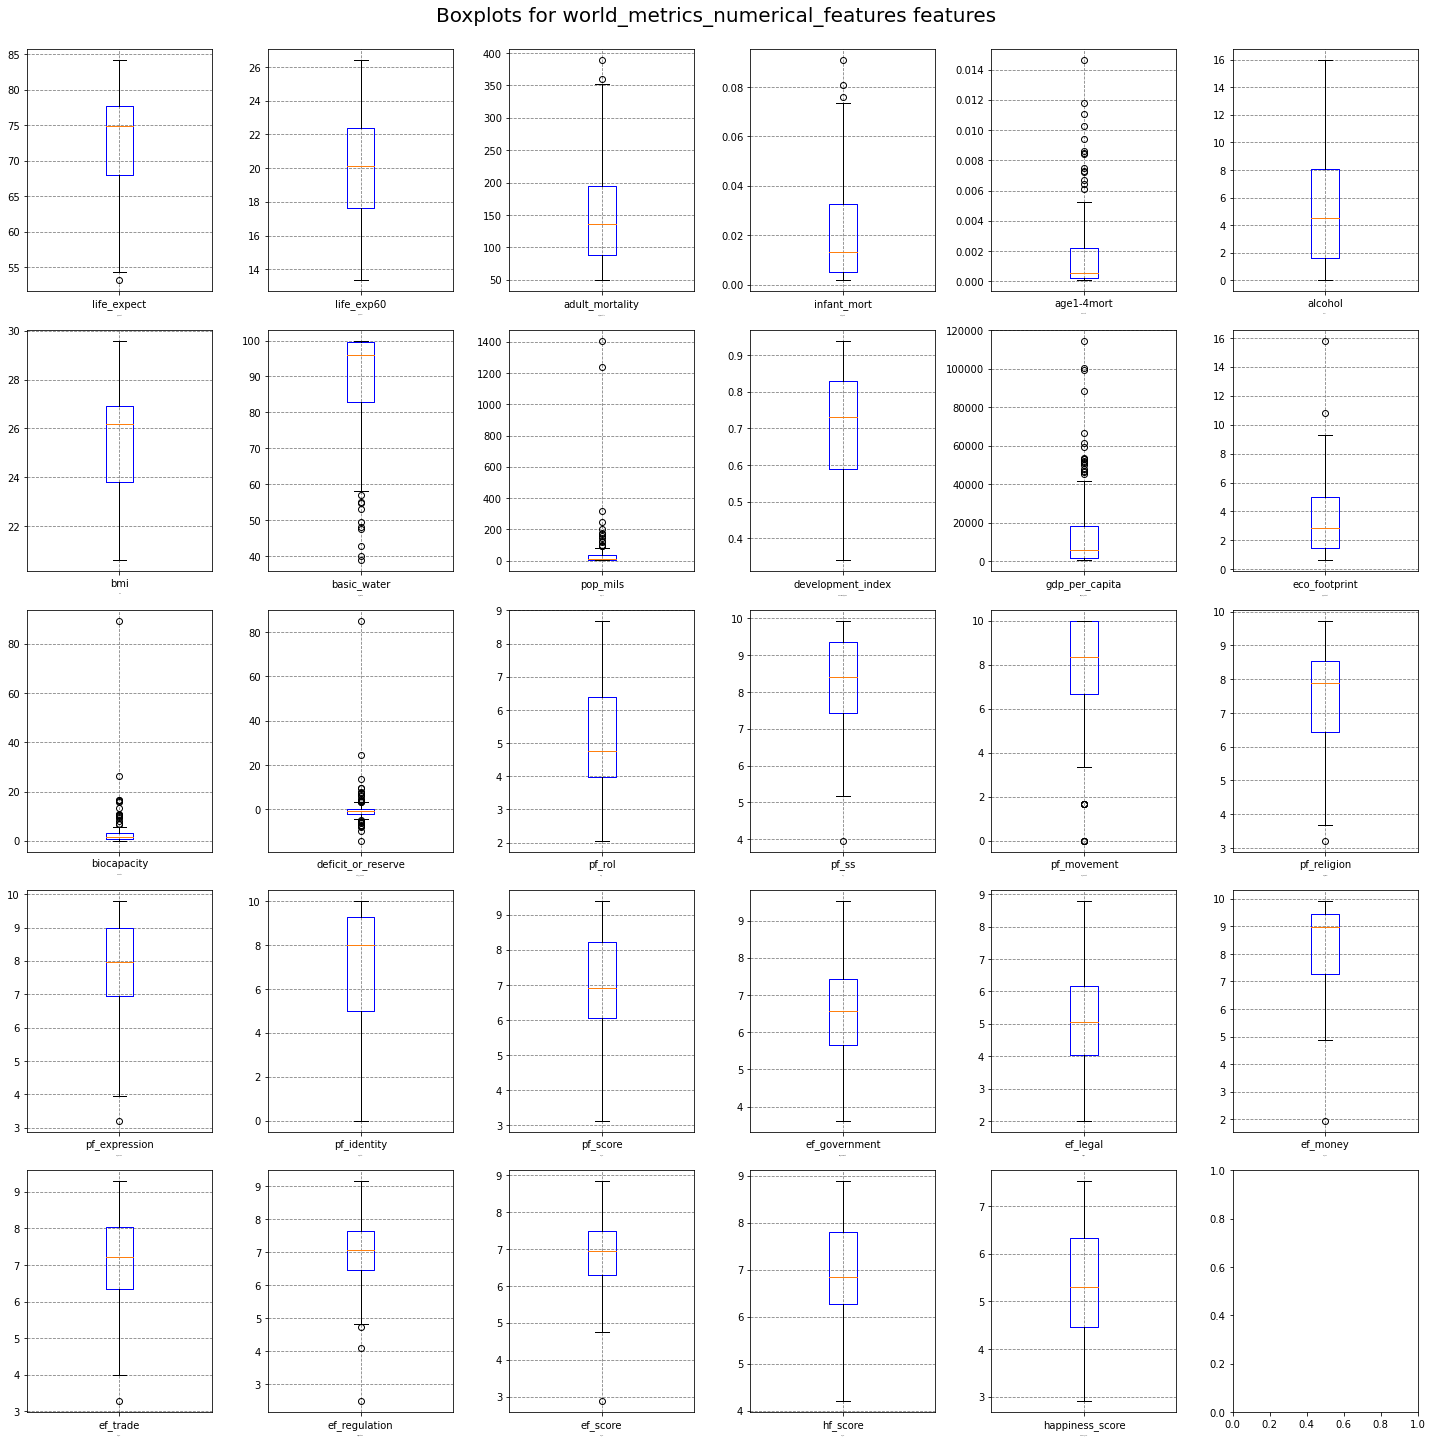

In [7]:
plot_boxplot(dataset=world_metrics_numerical_features,
             title="Boxplots for world_metrics_numerical_features features",
             title_fontsize=20, ax_fontsize=0,
             fig_width=20, fig_height=20, nrows=5, ncols=6)

We have identified additional metrics with outliers beyond our initial assumption. Here is the complete list of such features:

Please note that the metrics in **bold** were not initially identified as having outliers based on our first glance at the scatterplots.

- **`life_expect`**
- `adult_mortality`
- `infant_mort`
- `age1-4mort`
- `basic_water`
- `pop_mils`
- `gdp_per_capita`
- `eco_footprint`
- `biocapacity`
- `deficit_or_reserve`
- `pf_ss`
- **`pf_movement`**
- **`pf_religion`**
- **`pf_expression`**
- `ef_money`
- **`ef_trade`**
- `ef_regulation`
- `ef_score`

Some of the metrics in our dataset exhibit significant skewness. This can be observed from the reduced size of the central box and the presence of outliers.

The summary description of the entire dataset is presented below:

In [8]:
world_metrics.describe()

life_expect  life_exp60  adult_mortality  infant_mort  age1-4mort  \
count   137.000000  137.000000       137.000000   137.000000  137.000000   
mean     72.962743   20.262010       150.254420     0.021038    0.001848   
std       7.307447    3.026119        78.374564     0.020495    0.002789   
min      53.130500   13.349510        49.201850     0.001790    0.000070   
25%      68.039250   17.609330        87.429160     0.005000    0.000240   
50%      74.843090   20.117140       135.341100     0.013175    0.000545   
75%      77.762060   22.390870       194.952800     0.032560    0.002235   
max      84.166160   26.394020       388.805700     0.090800    0.014615   

          alcohol         bmi  basic_water     pop_mils  development_index  \
count  137.000000  137.000000   137.000000   137.000000         137.000000   
mean     5.167943   25.525547    88.432938    49.495737           0.704919   
std      3.803661    2.064334    15.825358   163.299515           0.155286   
min      0.000910   20.600000    38.852590     0.520000           0.340000   
25%      1.619590   23.800000    82.800580     4.800000           0.590000   
50%      4.538300   26.200000    95.992400    10.880000           0.730000   
75%      8.100000   26.900000    99.586750    36.350000           0.830000   
max     15.950260   29.600000   100.000000  1408.040000           0.940000   

       ...  pf_identity    pf_score  ef_government    ef_legal    ef_money  \
count  ...   137.000000  137.000000     137.000000  137.000000  137.000000   
mean   ...     7.034063    7.054373       6.506282    5.235571    8.352036   
std    ...     2.968634    1.418618       1.225005    1.530037    1.377262   
min    ...     0.000000    3.116028       3.616782    2.002915    1.942101   
25%    ...     5.000000    6.059028       5.664386    4.030095    7.258295   
50%    ...     8.000000    6.920446       6.576430    5.071814    8.971846   
75%    ...     9.250000    8.216035       7.430474    6.158069    9.432830   
max    ...    10.000000    9.398842       9.528485    8.798181    9.922187   

         ef_trade  ef_regulation    ef_score    hf_score  happiness_score  
count  137.000000     137.000000  137.000000  137.000000       137.000000  
mean     7.072647       6.997985    6.832847    6.943610         5.416920  
std      1.156196       1.007888    0.876275    1.044965         1.124471  
min      3.281311       2.483540    2.880000    4.200724         2.905000  
25%      6.355515       6.475280    6.290000    6.274969         4.459000  
50%      7.217833       7.058349    6.950000    6.848010         5.303000  
75%      8.050141       7.632668    7.490000    7.811560         6.324000  
max      9.291177       9.159782    8.840000    8.887410         7.526000  

[8 rows x 29 columns]

The question is: what should we do with all these outliers?

There are several ways how to deal with this issue:

1. **Removal**: to drop outliers from the dataset. 
    - Pros:
        * Very easy and straightforward approach;
        * Can increase the model permormance at the end. 
    - Cons: 
        * Can result in the loss of valuable information;
        * Can change the distribution of the data.

2. **Trimming**: to remove *a certain percentage of the data* from both the lower and upper ends of the distribution. 
    - Pros:
        * Less extreme than removal.
    - Cons:
        * Can still result in the loss of valuable information;
        * Can still change the distribution of the data.

3. **Winsorization**: to replace the outliers with the nearest non-outlier values.
    - Pros:
        * Can be effective in reducing the impact of outliers without losing information;
        * Does not change the distribution of the data. 
    - Cons:
        * Can be difficult to determine the appropriate replacement values;
        * Creates artificial values in the dataset.

4. **Transformations**: to normalize the distribution using math functions.
    - Pros:
        * Allows not to lose information;
        * Does not require the removal or replacement of data. 
    - Cons:
        * Can be difficult to determine the appropriate transformation;
        * Can also change the interpretation of the data.

5. **Robust statistics**: to use statistical methods that are less sensitive to outliers.
    - Pros:
        * Allows not to lose information;
        * Straightforward approach.
    - Cons: 
        * Can result in a loss of precision;
        * Can also change the interpretation of the data.

6. **Keep outliers**
    - Pros:
        * Straight forward approach;
    - Cons:
        * Can result in a loss of precision;
        * Can also change the interpretation of the data.

As we can observe, each of these approaches has its own advantages and disadvantages. Ultimately, the choice of strategy depends on our data and the objectives of the analysis.

For now, we will **retain** all the outliers in our dataset. If we encounter poor model performance, we can revisit our approach and consider removing the outliers as a potential solution.

## Duplicate data

In this preprocessing step, our goal is to identify any redundant data that could potentially cause overfitting and lead to skewed results. To achieve this, we will check for duplicate rows in the `world_metrics` dataframe to ensure that each country appears only once.

In [9]:
duplicates = world_metrics.duplicated()

print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


Great! It is good to see that there are no duplicate rows in the dataframe. This indicates that each country is represented only once, which is important for our analysis and modeling.

## Spatial distribution

Our dataset contains a data for 137 countries and 29 different features. Let us find out what countries are not included in our dataset.

First, we need to retrieve a list of countries that are in the dataset:

In [10]:
world_metrics_countries = world_metrics['country'].unique()

After that, we need to work with the list `countries_list` that contains all the states that exist today**. We want to transform it into a dataframe, and mark with Boolean values (i.e. True or False) which countries do we have in the `world_metrics` dataset:

** The list of countries is taken from [here](https://gist.github.com/kalinchernev/486393efcca01623b18d#file-countries) and updated manually.

In [11]:
regions_list = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua & Deps", "Antigua and Barbuda", "Argentina", "Armenia", 
                "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", 
                "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", 
                "Brunei", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia", "Cameroon", "Canada", "Cape Verde", "Cabo Verde",
                "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Democratic Republic of the Congo", 
                "Congo Republic", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti",
                "Dominica", "Dominican Republic", "East Timor", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", 
                "Eritrea", "Estonia", "Ethiopia", "Fiji", "Falkland Islands", "Finland", "France", "French Southern and Antarctic Lands", 
                "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Greenland", "Grenada", "Guatemala", "Guinea", 
                "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", 
                "Iraq", "Ireland", "Israel", "Italy", "Ivory Coast", "Côte d'Ivoire", "Jamaica", "Japan", "Jordan", 
                "Kazakhstan", "Kenya", "Kiribati", "Kosovo", "North Korea ", "South Korea", "Kosovo", "Kuwait", "Kyrgyz Republic", 
                "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", 
                "Luxembourg", "Macedonia", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", 
                "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", 
                "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", 
                "Nepal", "Netherlands", "New Zealand", "New Caledonia", "Nicaragua", "Niger", "Nigeria", "Norway", "Oman", 
                "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", 
                "Portugal", "Puerto Rico", "Qatar", "Romania", "Russia", "Rwanda", "St Kitts & Nevis", "St Lucia", 
                "Saint Vincent & the Grenadines", "Samoa", "San Marino", "Sao Tome & Principe", "Saudi Arabia", 
                "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", 
                "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", 
                "Suriname", "Swaziland", "Sweden", "Switzerland", "Syria", "Syrian Arab Republic", "Taiwan", "Tajikistan", "Tanzania", 
                "Thailand", "Togo", "Tonga", "Trinidad & Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", 
                "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", 
                "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"]

In [12]:
countries = pd.DataFrame(regions_list, columns=['country'])

countries['is_in_world_metrics'] = countries['country'].isin(world_metrics_countries)
countries.head(5)

country  is_in_world_metrics
0  Afghanistan                False
1      Albania                 True
2      Algeria                 True
3      Andorra                False
4       Angola                 True

Now, we need to use the following piece of code to be able to plot the interactive map:

```python
import plotly.express as px
```

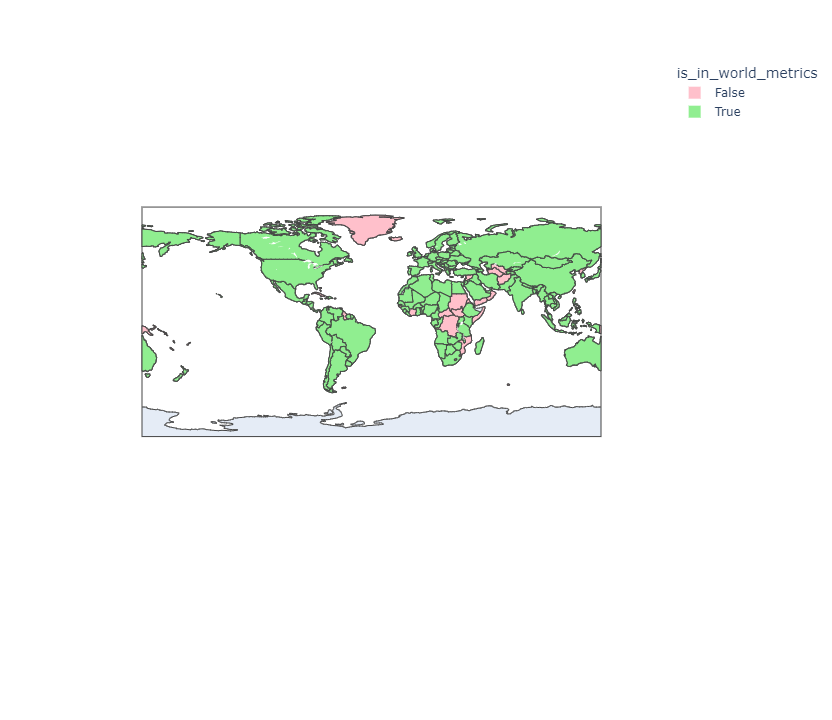

In [13]:
fig = px.choropleth(data_frame=countries,
                    locations="country",
                    locationmode="country names",
                    color="is_in_world_metrics",
                    color_discrete_map={True: "lightgreen", False: "pink"})
fig.show()

From the map above, one can see that the dataset represents data from all over the world, with mostly missing countries from Africa, and Central Asia. Hence, **our potential results migh be biased since they will not illustrate the relations between different factors and happiness score from a wide number of under-developed and developing countries**.

# Metrics Analysis

In the dataset, we have a total of 30 features. One feature represents `country` names, another feature represents the `happiness_score` (our target variable). The remaining 28 features will be used as input for our future models. However, we believe that 28 metrics are too many, so we want to identify the correlation levels between each metric and the happiness score.

To begin, let's create a subset of the initial dataset that includes only the features (excluding country names):

First, let us create a subset of the initial dataset that will contain features only (i.e., without country names):

In [14]:
world_metrics_features = world_metrics.iloc[:, 1:30]

Next, we will plot scatterplots with the `happiness_score` (our target feature) on the y-axis and the other metrics on the x-axis.

Additionally, we want to include a regression line in each scatterplot to approximate the relationship between two features.

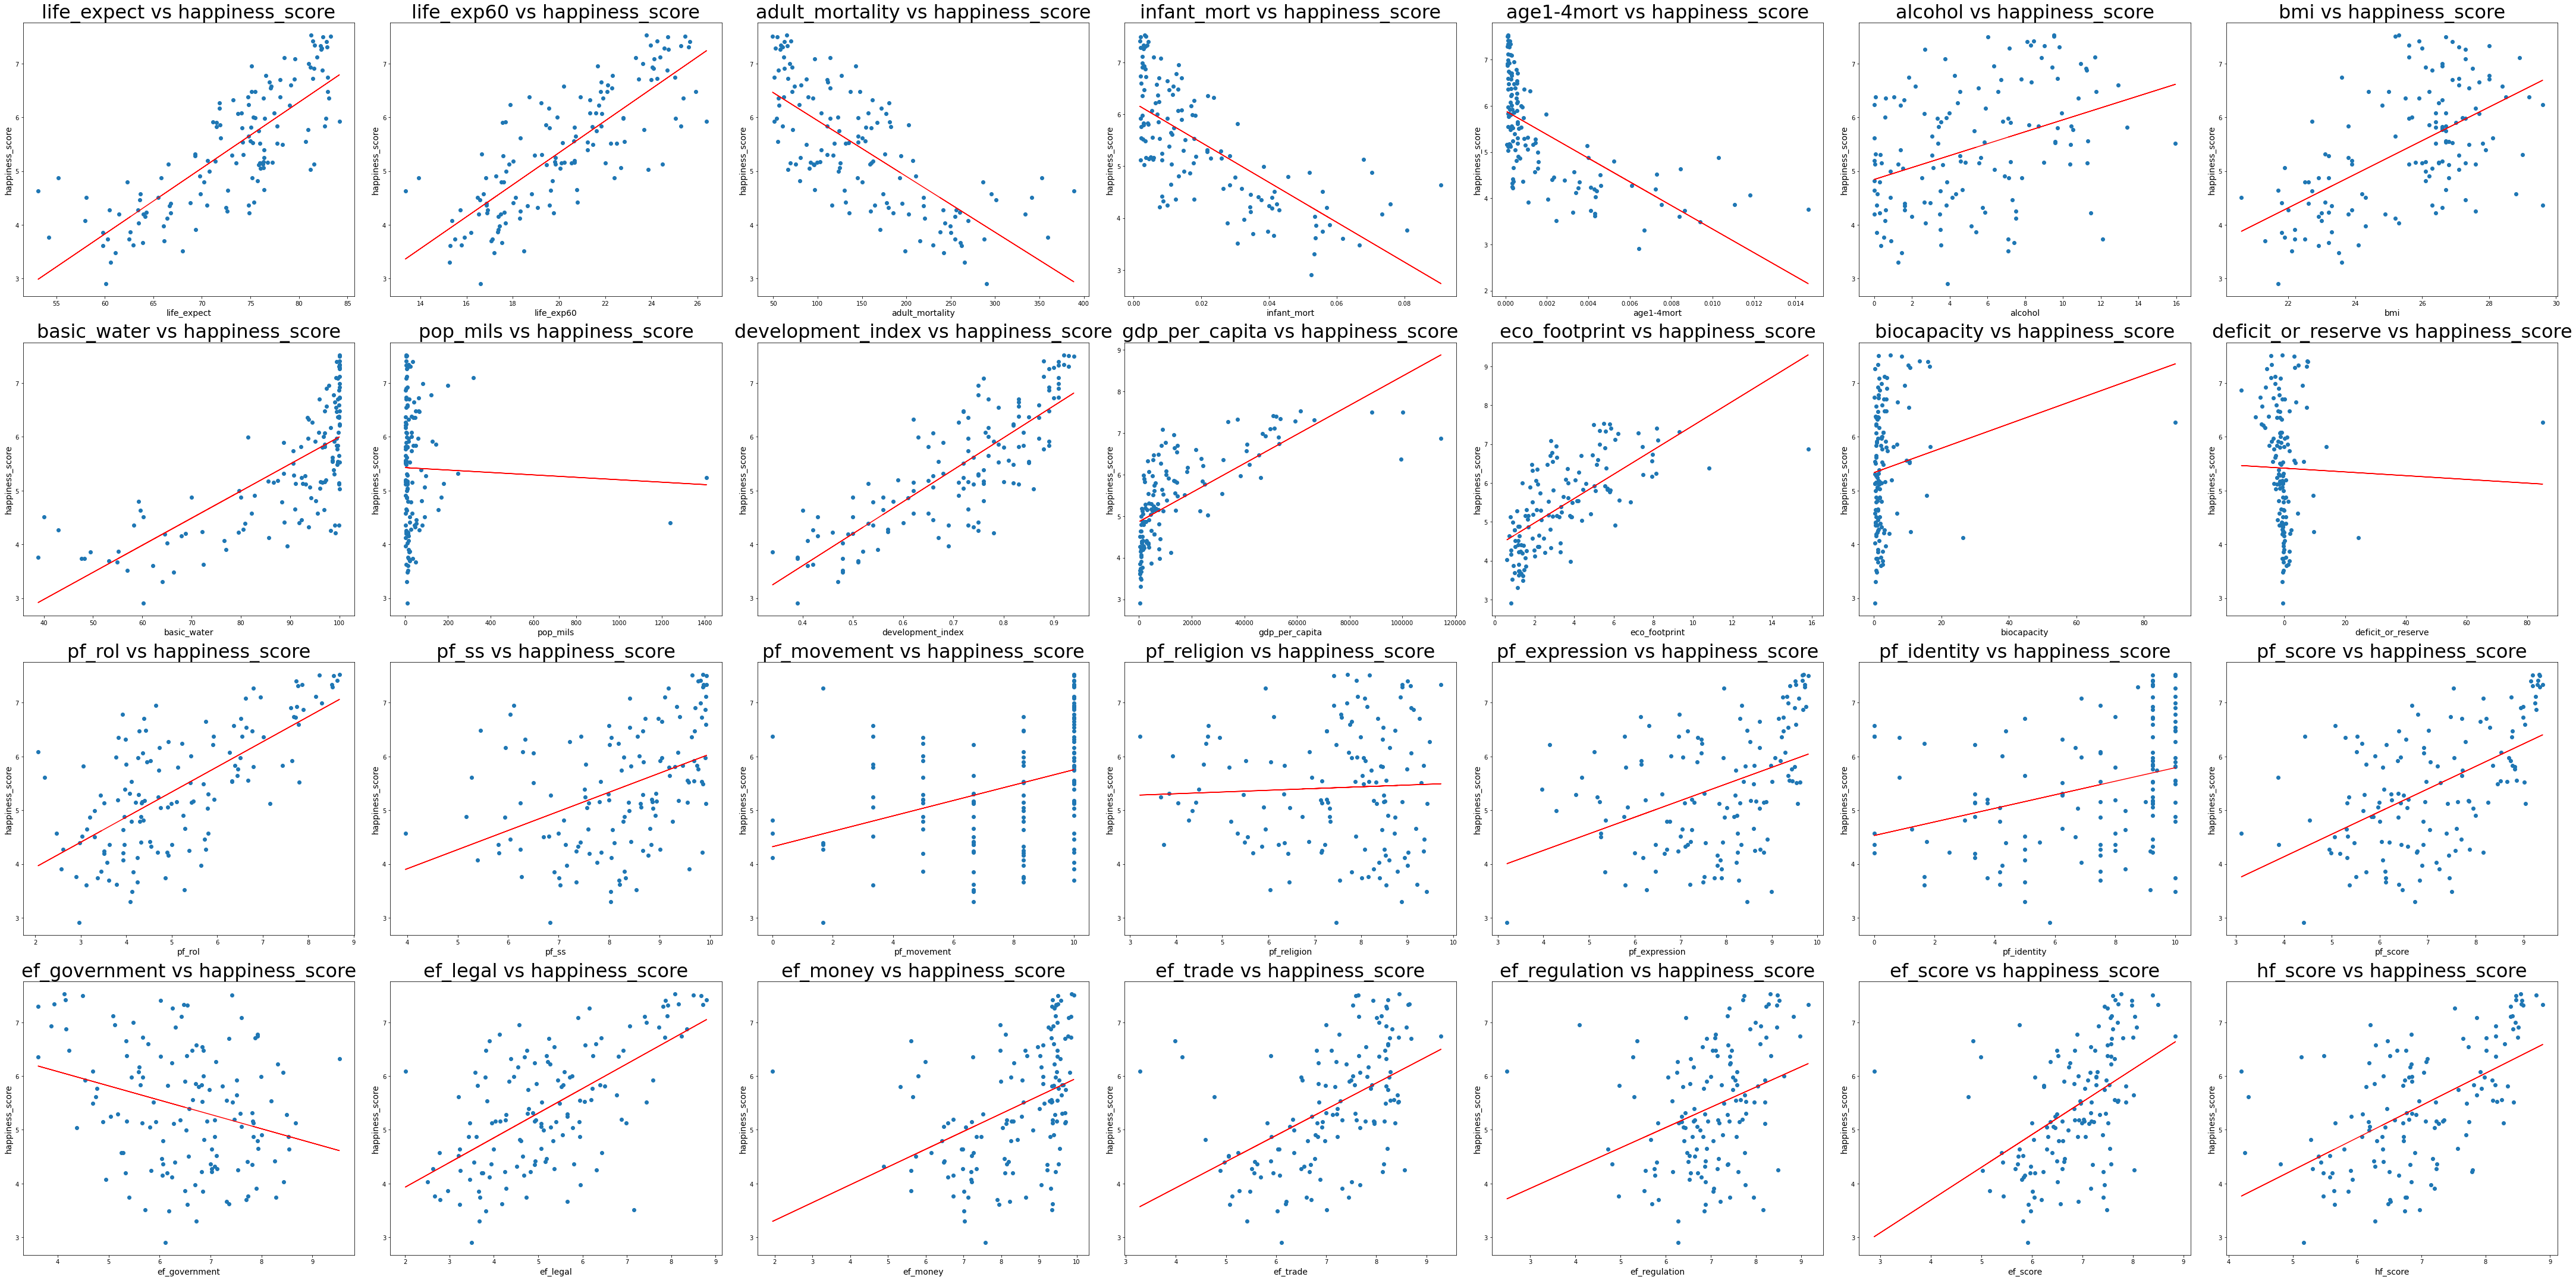

In [15]:
target_feature = "happiness_score"

fig, axs = plt.subplots(nrows=4, ncols=7, figsize=(60, 30))

for i, ax in enumerate(axs.flatten()):
    y_col = world_metrics_features.columns[i]
    x = world_metrics_features[y_col]
    y = world_metrics_features[target_feature]
    ax.scatter(x, y)
    ax.set_title(f"{y_col} vs {target_feature}", fontsize=32)
    ax.set_xlabel(y_col, fontsize=14)
    ax.set_ylabel(target_feature, fontsize=14)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, intercept + slope*x, color='r', label='Regression line')

plt.tight_layout()
plt.show()

Now, let's plot the correlation heatmap to visualize the correlation between different features in our dataset:

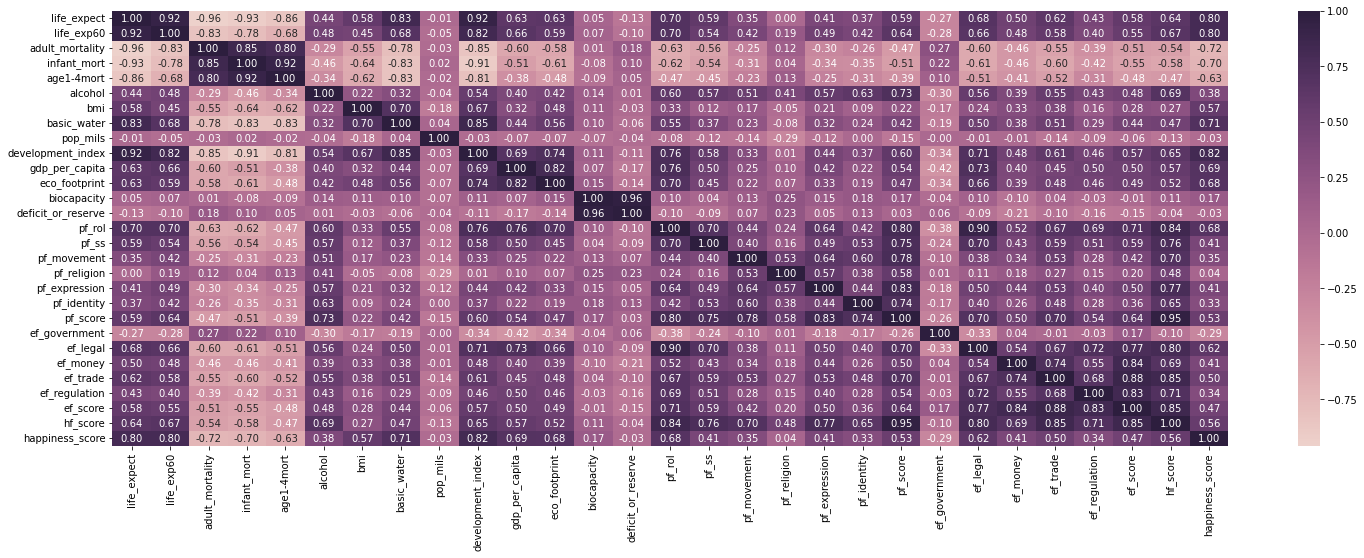

In [16]:
corr = world_metrics_features.corr()
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt=".2f", ax=ax)
plt.show()

To maintain consistency, we will define a strong positive correlation as a correlation coefficient above 0.6, and a strong negative correlation as a coefficient below -0.6.

Based on the correlation heatmap, we can observe the following strong positive correlations with the happiness score:
- `development_index` (0.82)
- `life_expect` (0.80)
- `life_exp60` (0.80)
- `basic_water` (0.71)
- `gdp_per_capita` (0.69)
- `eco_footprint` (0.68)
- `pf_rol` (0.68)
- `ef_legal` (0.62)

Additionally, there are strong negative correlations with the happiness score and the following metrics:
- `adult_mortality` (-0.72)
- `infant_mort` (-0.70)
- `age1-4mort` (-0.63)

Basically, looking at the metrics that have strong negative correlation, we could see that in order to be happy we just need to be alive (hahah).

Later on we will consider these features in our models. For now, we will use them to create a subset in order to reduce the dimensionality of the initial data.

In [17]:
world_metrics_subset = world_metrics[['country', 'development_index', 'life_expect', 'life_exp60', 'basic_water', 
                                      'gdp_per_capita', 'eco_footprint', 'pf_rol', 'ef_legal',
                                      'adult_mortality', 'infant_mort', 'age1-4mort', 'happiness_score']]

world_metrics_subset

country  development_index  life_expect  life_exp60  basic_water  \
0          Angola               0.52     62.63262    17.34829     55.08428   
1         Burundi               0.39     60.09811    16.59126     60.20415   
2           Benin               0.48     61.08568    17.20543     66.32024   
3    Burkina Faso               0.39     60.32101    15.48575     48.26772   
4        Botswana               0.69     66.05297    17.42258     89.40444   
..            ...                ...          ...         ...          ...   
132   New Zealand               0.91     82.24739    25.29202    100.00000   
133         Japan               0.89     84.16616    26.39402     98.97000   
134      Cambodia               0.55     69.36723    17.36710     76.94537   
135   South Korea               0.89     82.66409    25.26966     99.67540   
136          Laos               0.56     65.79089    16.83024     79.94190   

     gdp_per_capita  eco_footprint    pf_rol  ef_legal  adult_mortality  \
0           4665.91           0.93  3.451814  2.963635        237.96940   
1            276.69           0.80  2.961470  3.495487        290.18580   
2            746.83           1.41  4.129480  3.822761        242.37410   
3            671.07           1.21  4.860575  3.687657        254.60270   
4           7743.50           3.83  5.641684  5.950516        249.24130   
..              ...            ...       ...       ...              ...   
132        37488.30           5.60  7.868546  8.715280         66.05728   
133        46201.60           5.02  7.643490  7.586987         50.82619   
134          877.64           1.21  2.566741  4.277907        170.49700   
135        24155.80           5.69  7.438183  6.391154         60.81405   
136         1236.24           1.22  3.953482  5.937201        192.79390   

     infant_mort  age1-4mort  happiness_score  
0       0.057900    0.007520            3.866  
1       0.052420    0.006450            2.905  
2       0.066690    0.009390            3.484  
3       0.055795    0.008635            3.739  
4       0.032560    0.002040            3.974  
..           ...         ...              ...  
132     0.003975    0.000235            7.334  
133     0.001980    0.000195            5.921  
134     0.027600    0.001110            3.907  
135     0.002955    0.000125            5.835  
136     0.051895    0.003990            4.876  

[137 rows x 13 columns]

In the following part of the project we will use different clustering approaches to investigate our data even more. Stay tuned...

# Clustering Analysis

We want to understand what was the "happiness distribution" in the world in 2016. To start, we will make a "vanilla" version which is based on the quantiles. Hence, we need to sort the data with respect to the `happiness_score` values.

In [18]:
vanila_subset = world_metrics_subset[['country', 'happiness_score']]
vanila_subset_sorted = vanila_subset.sort_values('happiness_score', ascending=True)
vanila_subset_sorted['quantile'] = pd.qcut(vanila_subset_sorted['happiness_score'], q=4, labels=False)
vanila_subset_sorted.head()

country  happiness_score  quantile
1   Burundi            2.905         0
11     Togo            3.303         0
2     Benin            3.484         0
15   Rwanda            3.515         0
29   Guinea            3.607         0

The main step involves dividing the dataset into four quantiles (based on the existing range of values). Hence, our Split 1 consist of the folowing:

1. Q0 - totally unhappy countries (2.905 - 4.060)
2. Q1 - unhappy countries (4.061 - 5.216)
3. Q2 - pretty happy countries (5.217 - 6.372)
4. Q3 - the happiest countries (6.373 - 7.528)

However, the predefined range of happiness scores is from 0 to 10. So, there is another approach for splitting the countries in 4 equal parts. Hence, our Split 2 looks like this:

1. Q0 - totally unhappy countries (0.0 - 2.5)
2. Q1 - unhappy countries (2.5 - 5.0)
3. Q2 - pretty happy countries (5.0 - 7.5)
4. Q3 - the happiest countries (7.5 - 10)

However, it is important to note that this division does not accurately reflect real life. It is not completely fair to split countries in this kind of bins since "the maximal happiness" that was ever experienced by state is around 7-8. Therefore, although countries have a tendency of developing this score, it is better to rely on the existing range (Split 1), rather the predefined one (Split 2).

In [19]:
vanila_subset_ = world_metrics_subset[['country', 'happiness_score']]
vanila_subset_sorted_ = vanila_subset_.sort_values('happiness_score', ascending=True)

bins = [0, 2.5, 5, 7.5, 10]

vanila_subset_sorted_['quantile'] = pd.cut(vanila_subset_sorted_['happiness_score'], bins=bins, labels=False)

Here is a scatterplot that visually represents the sorted happiness scores among countries using both approaches:

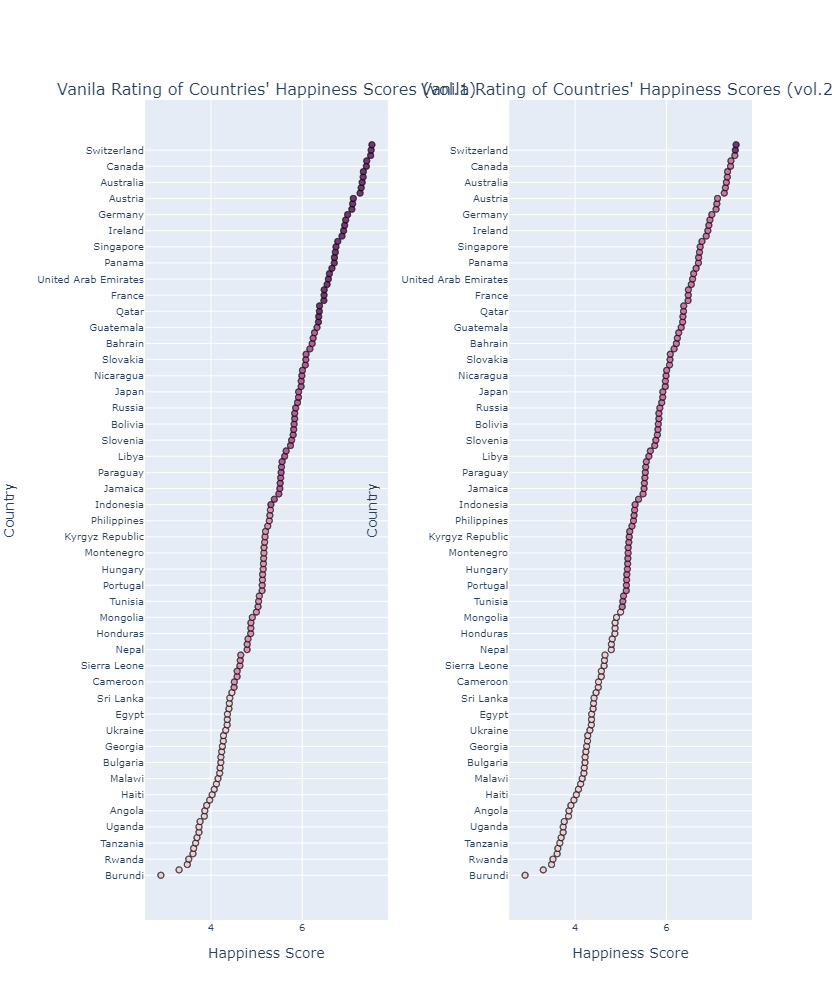

In [20]:
fig = make_subplots(rows=1, cols=2, subplot_titles=["Vanila Rating of Countries' Happiness Scores (vol.1)",
                                                    "Vanila Rating of Countries' Happiness Scores (vol.2)"],
                    horizontal_spacing=0.2)

scatter1 = go.Scatter(x=vanila_subset_sorted['happiness_score'],
                      y=vanila_subset_sorted['country'],
                      mode='markers',
                      marker=dict(color=vanila_subset_sorted['quantile'],
                                  colorscale='Magenta', opacity=0.9,
                                  size=6, line=dict(width=1, color='black')),
                      text=vanila_subset_sorted['quantile'],
                      showlegend=False)


scatter2 = go.Scatter(x=vanila_subset_sorted_['happiness_score'],
                      y=vanila_subset_sorted_['country'],
                      mode='markers',
                      marker=dict(color=vanila_subset_sorted_['quantile'],
                                  colorscale='Magenta', opacity=0.9,
                                  size=6, line=dict(width=1, color='black')),
                      text=vanila_subset_sorted_['quantile'],
                      showlegend=False)

fig.add_trace(scatter1, row=1, col=1)
fig.add_trace(scatter2, row=1, col=2)

fig.update_layout(height=1000)
fig.update_xaxes(title_text='Happiness Score', tickfont={'size': 10}, row=1, col=1)
fig.update_xaxes(title_text='Happiness Score', tickfont={'size': 10}, row=1, col=2)
fig.update_yaxes(title_text='Country', tickfont={'size': 10}, row=1, col=1)
fig.update_yaxes(title_text='Country', tickfont={'size': 10}, row=1, col=2)

fig.show()

In [21]:
quintile_counts_ = vanila_subset_sorted_['quantile'].value_counts().sort_index()
print(quintile_counts_)

1    50
2    85
3     2
Name: quantile, dtype: int64


We can observe that Split 2 resulted in a larger size of Q2 and the disappearance of Q0. Additionally, Q3 is now represented by Switzerland and Denmark only.

Therefore, this visualization is not perfect. To gain a more comprehensive understanding, let's plot a map to visualize these results in a more intuitive manner.

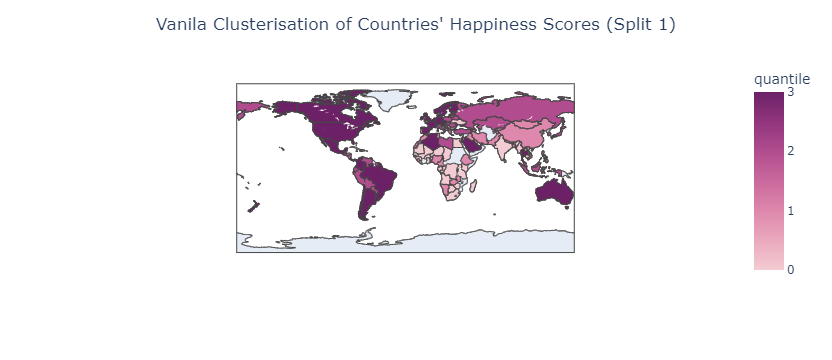

In [22]:
fig = px.choropleth(vanila_subset_sorted,
                    locations="country",
                    locationmode="country names",
                    color="quantile",
                    color_continuous_scale=px.colors.sequential.Magenta)

fig.update_layout(title={'text': "Vanila Clusterisation of Countries' Happiness Scores (Split 1)",
                         'y':0.95,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()

Indeed, with this map visualization, we can clearly observe that Europe, North America, Australia, and parts of South America are the regions with higher happiness scores. Conversely, as expected, Africa appears to have lower happiness scores compared to other regions.

It is noteworthy that Mexico, Algeria, Saudi Arabia, and Thailand are unexpectedly included in the list of happiest countries. 

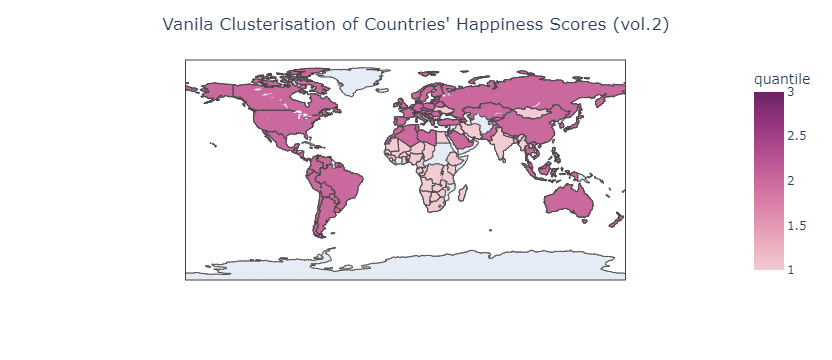

In [23]:
fig = px.choropleth(vanila_subset_sorted_,
                    locations="country",
                    locationmode="country names",
                    color="quantile",
                    color_continuous_scale=px.colors.sequential.Magenta)

fig.update_layout(title={'text': "Vanila Clusterisation of Countries' Happiness Scores (vol.2)",
                         'y':0.95,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()

With the Split 2 the distribution of happiness scores shifted, and the overall level of happiness seems to have decreased...

It is interesting to note that several countries that were previously in the third quartile (Q3) are now in the second quartile (Q2), with the exception of Switzerland and Denmark.

Now, let's move to more advanced techniques of clustering analysis.

## KMeans and Hierarchical Clustering

In this section, we will cluster our data based on two methods:

- **K-means Clustering**

K-means clustering is a popular unsupervised ML algorithm used for grouping data points into distinct clusters based on their similarity. The algorithm aims to minimize the distance between data points within the same cluster while maximizing the distance between different clusters. It iteratively assigns data points to the nearest centroid and updates the centroids until convergence, resulting in well-separated clusters.

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

- **Hierarchical Clustering**

Hierarchical clustering is a versatile clustering algorithm that creates a hierarchy of clusters, forming a tree-like structure known as a dendrogram. It does not require a predetermined number of clusters and can handle datasets of any size. The algorithm starts by considering each data point as an individual cluster and then merges or agglomerates clusters based on their similarity, gradually forming larger clusters until all data points belong to a single cluster or the desired number of clusters is reached. As parameters, we specify the number of clusters (`n_clusters`), the metric (`euclidian`), and the linkage (`ward`).

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering).

To further explore our data, we want to investigate the relationship between the happiness score and various aspects of society following the tripple bottom line, and thus the economic, social and ecological pillar. By examining these pillars, we hope to gain valuable insights into how different factors contribute to overall happiness and well-being. 

We have chosen the following factors from out dataset for the 3 pillars:

- **Economic pillar: GDP per capita**

GDP per capita is a widely recognized and commonly used indicator measuring the economic well-being and prosperity of a country. It reflects the average economic output per person and provides a measure of the overall economic development and standard of living. By incorporating `gdp_per_capita` into our analysis, we can assess the influence of economic factors on the happiness score.

- **Ecological pillar: Ecological Footprint**

This variable measures the ecological footprint, which quantifies the impact of human activities on the environment in terms of resource consumption and waste production. By incorporating `eco_footprint` into our analysis, we can assess the relationship between ecological sustainability and the happiness score. 

- **Social pillar: Personal Freedom (pf_rol)**

Personal freedom is a vital aspect of societal well-being, covering various dimensions such as individual liberties, civil rights, and rule of law. By considering `pf_rol`, we can explore the impact of social and legal frameworks on the happiness score and understand the importance of personal freedom in overall happiness.

For more details about each feature, please refe to the introduction part where we presented all the features.

### Preparing the data

Since we are now working with the specific features, before we cluster, it would be better to investigate them a bit more. Afterwards, we will create the needed variables (`X`, and `y`), as well as choose the appropriate number of clusters.

In [24]:
X = world_metrics[['gdp_per_capita', 'eco_footprint', 'pf_rol']]
y = world_metrics['happiness_score']

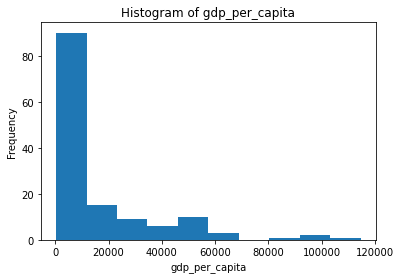

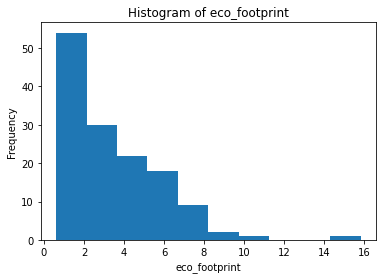

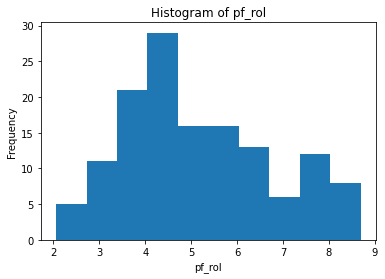

In [25]:
for column in X.columns:
    plot_histogram(X[column], title=f'Histogram of {column}', xlabel=column, ylabel='Frequency')

With these histograms, we see that both `gdp_per_capita` and `eco-footpring` are highly skewed to the right. Thus, to be able to work with these data, we need to first log-transform these two variables to reduce skewness and make the distribution closer to normal. 

The variable `pf_rol` seems to be roughly normally distributed and does not need to be transformed further.

In [26]:
skewness = calculate_skewness(X)

for i, column in enumerate(X.columns):
    print(f"Skewness of {column}: {skewness[i]}")

Skewness of gdp_per_capita: 2.18
Skewness of eco_footprint: 1.564
Skewness of pf_rol: 0.46


These numbers on skewness confirm the insight from the histograms.

In [27]:
world_metrics_2 = world_metrics.copy()

world_metrics_2['gdp_per_capita'] = np.log(world_metrics_2['gdp_per_capita'])
world_metrics_2['eco_footprint'] = np.log(world_metrics_2['eco_footprint'])

![sheldon_log](https://64.media.tumblr.com/tumblr_m6a07qfMhd1r9ljhqo1_500.gif)

### Model definition

In order to find the optimal number of clusters (K) for K-means, we will check the Elbow method.

C:\Users\emili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\emili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\emili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\emili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

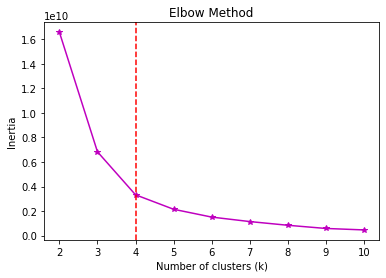

In [28]:
inertia = []
nbr_clusters = range(2,11)
for k in nbr_clusters:
    kmeans = KMeans(n_clusters=k, random_state=17, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(nbr_clusters, inertia, 'm*-')
plt.axvline(x=4, color='r', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**Interpretation of the Elbow Method**:

Based on the resulting plot, we can look for the elbow point. This is the point where the SSE starts to level off, indicating that the additional clusters do not contribute significantly to reducing the distance between the data points and their assigned cluster centers. In this case, it appears that the **elbow point is at K=4**, since the decrease in SSE slows down significantly beyond this point. Therefore, we can conclude that **4 clusters may be the optimal number for this dataset**.

As we determined K=4 o be the optimal number of clusters for k-means clustering, we will consider the same number of clusters for hierarchical clustering as well. This will allow you us compare the results of the two clustering approaches using a consistent number of clusters.

In [29]:
# Create X and y variables
X = world_metrics_2[['gdp_per_capita', 'eco_footprint', 'pf_rol']]
y = world_metrics_2['happiness_score']

#### K-Means clustering

In [30]:
# Set up KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=17, n_init='auto') 

# Fit the model
kmeans.fit(X)

C:\Users\emili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, n_init='auto', random_state=17)

#### Hierarchical clustering

In [31]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
hierarchical.fit(X)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

### Comparison KMeans vs Hierarchical

#### KMeans vs Hierarchical: GDP per capita

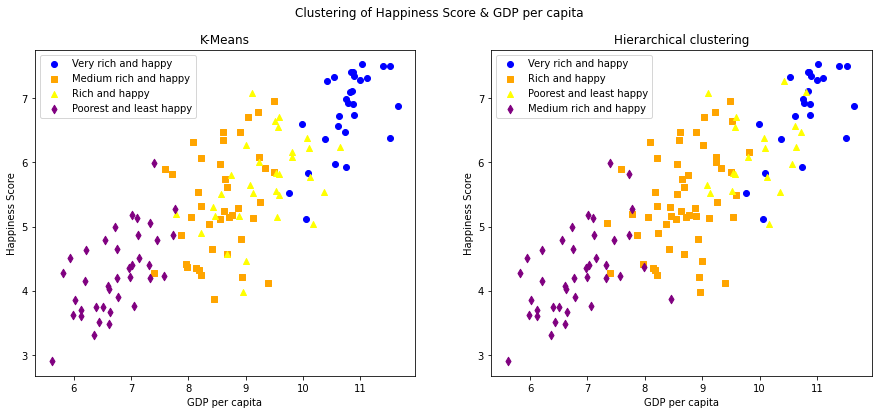

In [32]:
# Add columns to our dataframe with the cluster labels
world_metrics_2['cluster knn'] = kmeans.labels_
world_metrics_2['cluster hc'] = hierarchical.labels_

# Adjust cluster hc to obtain the same cluster labels as cluster knn when the prediction is the same
cluster_dict = {0: 1, 1: 2, 2: 3, 3: 0}

world_metrics_2['cluster hc'] = world_metrics_2['cluster hc'].map(cluster_dict)

# Define colors for clusters
colors = ['blue', 'orange', 'yellow', 'purple']

# We will do two subplots, one for K-Means and the other for hierarchical clustering
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle("Clustering of Happiness Score & GDP per capita")

# K-Means
ax[0].set_title("K-Means")
ax[0].set_xlabel("GDP per capita")
ax[0].set_ylabel("Happiness Score")
for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster knn'] == cluster]
    ax[0].scatter(cluster_data['gdp_per_capita'], cluster_data['happiness_score'],
                  color=colors[cluster],
                  marker=['o', 's', '^', 'd'][cluster],
                  label=[ 'Very rich and happy', 'Medium rich and happy', 'Rich and happy','Poorest and least happy'][cluster])
ax[0].legend()  # Show the legend

# Hierarchical clustering
ax[1].set_title("Hierarchical clustering")
ax[1].set_xlabel("GDP per capita")
ax[1].set_ylabel("Happiness Score")
for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster hc'] == cluster]
    ax[1].scatter(cluster_data['gdp_per_capita'], cluster_data['happiness_score'],
                  color=colors[cluster],
                  marker=['o', 's', '^', 'd'][cluster],
                  label=['Very rich and happy', 'Rich and happy', 'Poorest and least happy', 'Medium rich and happy' ][cluster])
ax[1].legend()  # Show the legend

plt.show()

### GDP per capita: interactive

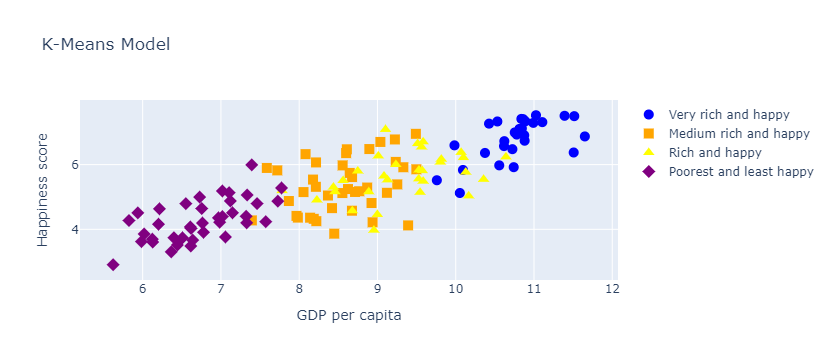

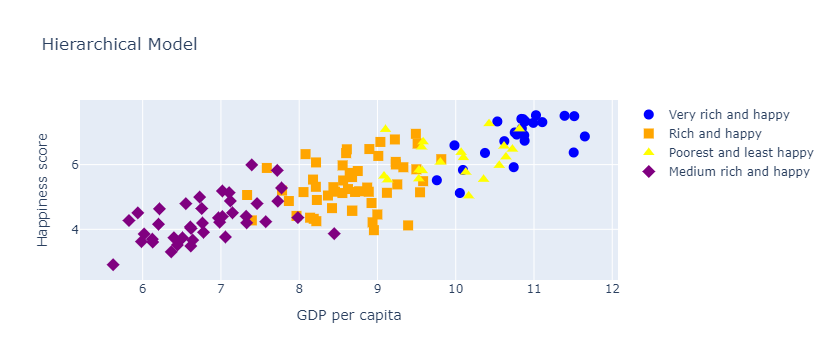

In [69]:
# K-Means Model
fig = go.Figure()

for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster knn'] == cluster]
    fig.add_trace(go.Scatter(
        x=cluster_data['gdp_per_capita'],
        y=cluster_data['happiness_score'],
        mode='markers',
        marker=dict(
            color=colors[cluster],
            symbol=['circle', 'square', 'triangle-up', 'diamond'][cluster],
            size=10,
        ),
        name=[ 'Very rich and happy', 'Medium rich and happy', 'Rich and happy','Poorest and least happy'][cluster],
        hovertext=cluster_data['country'],
    ))

fig.update_layout(
    xaxis_title='GDP per capita',
    yaxis_title='Happiness score',
    title='K-Means Model'
)

# Hierarchical Model
fig2 = go.Figure()

for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster hc'] == cluster]
    fig2.add_trace(go.Scatter(
        x=cluster_data['gdp_per_capita'],
        y=cluster_data['happiness_score'],
        mode='markers',
        marker=dict(
            color=colors[cluster],
            symbol=['circle', 'square', 'triangle-up', 'diamond'][cluster],
            size=10,
        ),
        name=['Very rich and happy', 'Rich and happy', 'Poorest and least happy', 'Medium rich and happy'][cluster],
        hovertext=cluster_data['country'],
    ))

fig2.update_layout(
    xaxis_title='GDP per capita',
    yaxis_title='Happiness score',
    title='Hierarchical Model'
)

# Display the interactive plots
fig.show()
fig2.show()

#### KMeans vs Hierarchical: Ecological footprint

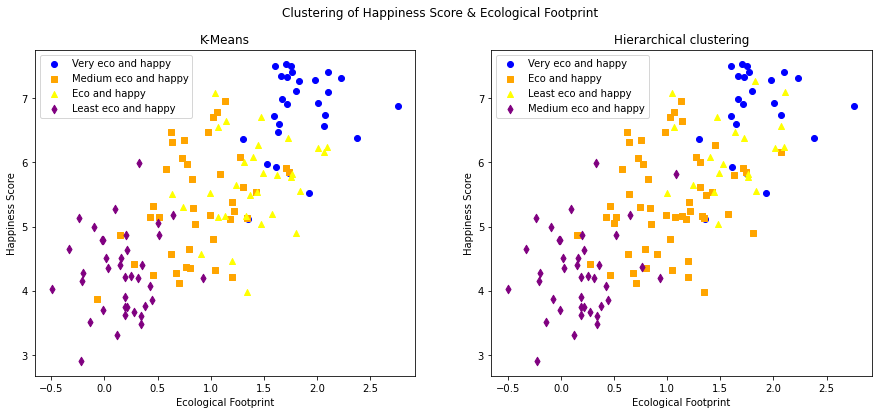

In [34]:
# Add columns to our dataframe with the cluster labels
world_metrics_2['cluster knn'] = kmeans.labels_
world_metrics_2['cluster hc'] = hierarchical.labels_

# Adjust cluster hc to obtain the same cluster labels as cluster knn when the prediction is the same
cluster_dict = {0: 1, 1: 2, 2: 3, 3: 0}

world_metrics_2['cluster hc'] = world_metrics_2['cluster hc'].map(cluster_dict)

# Define colors for clusters
colors = ['blue', 'orange', 'yellow', 'purple']

# We will do two subplots, one for K-Means and the other for hierarchical clustering
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle("Clustering of Happiness Score & Ecological Footprint")

# K-Means
ax[0].set_title("K-Means")
ax[0].set_xlabel("Ecological Footprint")
ax[0].set_ylabel("Happiness Score")
for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster knn'] == cluster]
    ax[0].scatter(cluster_data['eco_footprint'], cluster_data['happiness_score'],
                  color=colors[cluster],
                  marker=['o', 's', '^', 'd'][cluster],
                  label=[ 'Very eco and happy', 'Medium eco and happy', 'Eco and happy','Least eco and happy'][cluster])
ax[0].legend()  # Show the legend

# Hierarchical clustering
ax[1].set_title("Hierarchical clustering")
ax[1].set_xlabel("Ecological Footprint")
ax[1].set_ylabel("Happiness Score")
for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster hc'] == cluster]
    ax[1].scatter(cluster_data['eco_footprint'], cluster_data['happiness_score'],
                  color=colors[cluster],
                  marker=['o', 's', '^', 'd'][cluster],
                  label=['Very eco and happy', 'Eco and happy', 'Least eco and happy', 'Medium eco and happy' ][cluster])
ax[1].legend()  # Show the legend

plt.show()

#### Ecological footprint: interactive

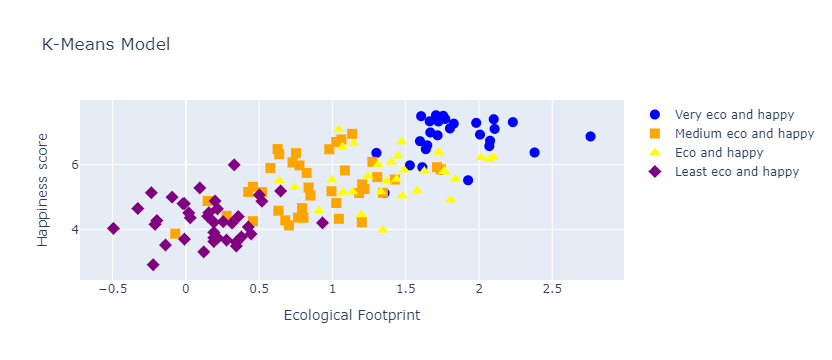

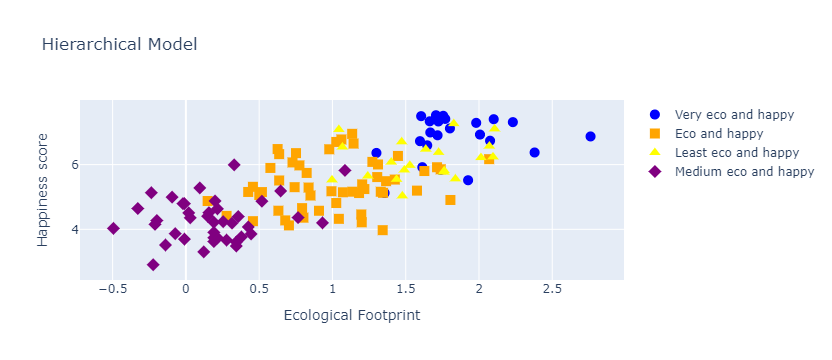

In [35]:
# K-Means Model
fig = go.Figure()

for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster knn'] == cluster]
    fig.add_trace(go.Scatter(
        x=cluster_data['eco_footprint'],
        y=cluster_data['happiness_score'],
        mode='markers',
        marker=dict(
            color=colors[cluster],
            symbol=['circle', 'square', 'triangle-up', 'diamond'][cluster],
            size=10,
        ),
        name=[ 'Very eco and happy', 'Medium eco and happy', 'Eco and happy','Least eco and happy'][cluster],
        hovertext=cluster_data['country'],
    ))

fig.update_layout(
    xaxis_title='Ecological Footprint',
    yaxis_title='Happiness score',
    title='K-Means Model'
)

# Hierarchical Model
fig2 = go.Figure()

for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster hc'] == cluster]
    fig2.add_trace(go.Scatter(
        x=cluster_data['eco_footprint'],
        y=cluster_data['happiness_score'],
        mode='markers',
        marker=dict(
            color=colors[cluster],
            symbol=['circle', 'square', 'triangle-up', 'diamond'][cluster],
            size=10,
        ),
        name=['Very eco and happy', 'Eco and happy', 'Least eco and happy', 'Medium eco and happy'][cluster],
        hovertext=cluster_data['country'],
    ))

fig2.update_layout(
    xaxis_title='Ecological Footprint',
    yaxis_title='Happiness score',
    title='Hierarchical Model'
)

# Display the interactive plots
fig.show()
fig2.show()


#### KMeans vs Hierarchical: Personal freedom

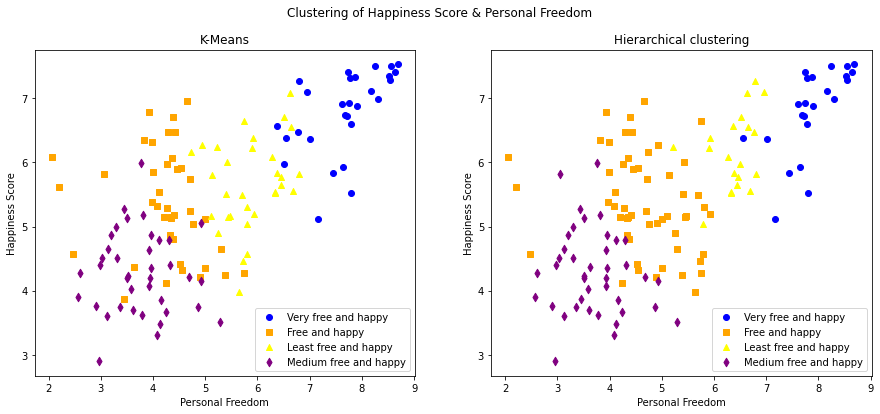

In [36]:
# Add columns to our dataframe with the cluster labels
world_metrics_2['cluster knn'] = kmeans.labels_
world_metrics_2['cluster hc'] = hierarchical.labels_

# Adjust cluster hc to obtain the same cluster labels as cluster knn when the prediction is the same
cluster_dict = {0: 1, 1: 2, 2: 3, 3: 0}

world_metrics_2['cluster hc'] = world_metrics_2['cluster hc'].map(cluster_dict)

# Define colors for clusters
colors = ['blue', 'orange', 'yellow', 'purple']

# We will do two subplots, one for K-Means and the other for hierarchical clustering
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle("Clustering of Happiness Score & Personal Freedom")

# K-Means
ax[0].set_title("K-Means")
ax[0].set_xlabel("Personal Freedom")
ax[0].set_ylabel("Happiness Score")
for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster knn'] == cluster]
    ax[0].scatter(cluster_data['pf_rol'], cluster_data['happiness_score'],
                  color=colors[cluster],
                  marker=['o', 's', '^', 'd'][cluster],
                  label=['Very free and happy', 'Free and happy', 'Least free and happy', 'Medium free and happy' ][cluster])
ax[0].legend()  # Show the legend

# Hierarchical clustering
ax[1].set_title("Hierarchical clustering")
ax[1].set_xlabel("Personal Freedom")
ax[1].set_ylabel("Happiness Score")
for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster hc'] == cluster]
    ax[1].scatter(cluster_data['pf_rol'], cluster_data['happiness_score'],
                  color=colors[cluster],
                  marker=['o', 's', '^', 'd'][cluster],
                  label=['Very free and happy', 'Free and happy', 'Least free and happy', 'Medium free and happy' ][cluster])
ax[1].legend()  # Show the legend

plt.show()

#### Personal Freedom: Interactive

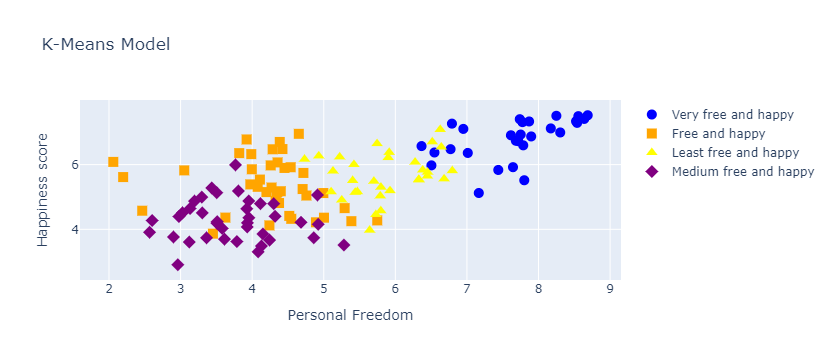

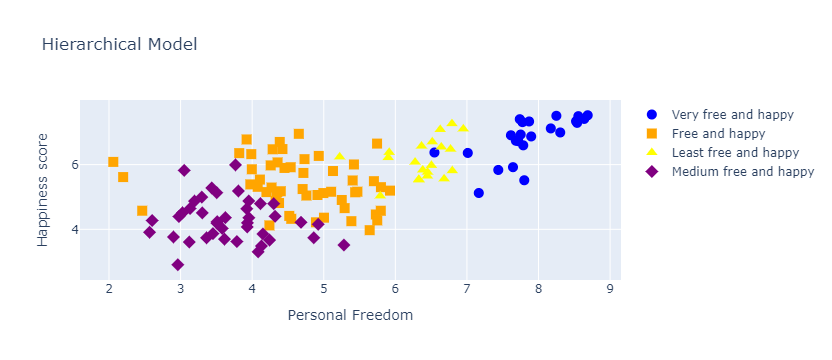

In [37]:
# K-Means Model
fig = go.Figure()

for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster knn'] == cluster]
    fig.add_trace(go.Scatter(
        x=cluster_data['pf_rol'],
        y=cluster_data['happiness_score'],
        mode='markers',
        marker=dict(
            color=colors[cluster],
            symbol=['circle', 'square', 'triangle-up', 'diamond'][cluster],
            size=10,
        ),
        name=['Very free and happy', 'Free and happy', 'Least free and happy', 'Medium free and happy'][cluster],
        hovertext=cluster_data['country'],
    ))

fig.update_layout(
    xaxis_title='Personal Freedom',
    yaxis_title='Happiness score',
    title='K-Means Model'
)

# Hierarchical Model
fig2 = go.Figure()

for cluster in range(4):
    cluster_data = world_metrics_2[world_metrics_2['cluster hc'] == cluster]
    fig2.add_trace(go.Scatter(
        x=cluster_data['pf_rol'],
        y=cluster_data['happiness_score'],
        mode='markers',
        marker=dict(
            color=colors[cluster],
            symbol=['circle', 'square', 'triangle-up', 'diamond'][cluster],
            size=10,
        ),
        name=['Very free and happy', 'Free and happy', 'Least free and happy', 'Medium free and happy'][cluster],
        hovertext=cluster_data['country'],
    ))

fig2.update_layout(
    xaxis_title='Personal Freedom',
    yaxis_title='Happiness score',
    title='Hierarchical Model'
)

# Display the interactive plots
fig.show()
fig2.show()

#### Interpretation of the clustering results

By performing the Elbow method, we saw that the optimal number of clusters seems to be 4. However, despite choosing this optimal number and log-transforming our variables where needed, we see that the clusters are not clearly distinguishable and overlap with each other. Also when previously testing with scaling methods such as MinMaxScaler and StandardScaler, the clusters were still overlapping.

There could be several reasons why for this:

- *Complexity of Happiness*: Happiness is a complex and multidimensional construct influenced by various factors beyond personal freedom, GDP per capita, and the ecological footprint. Modeling only these variables as representations of the three pillars may not fully capture the complexities and interactions contributing to happiness. Thus, this incomplete information could contribute to the overlapping clusters.

- *Interactions among Variables*: The interactions between personal freedom, GDP per capita, and the ecological footprint could have a significant impact on happiness. Therefore, solely modeling each variable independently may overlook the combined effects and interactions, resulting in overlapping clusters.

- *Noise and outliers*: The presence of noise or outliers in the data can contribute to overlapping clusters. As we did not remove outliers, they might impact the clustering results. Moreover, the results might be influenced by random variations hindering clear cluster separation.

To address these issues, the following steps could be performed:

- *Refining feature selection*: By reviewing chosen variables and including additional relevant features per pillar, we could better capture the pillar's complexities as well as the overall complexity of measuring happiness.

- *Feature engineering*: Beyond the performed log-transformation, it might be beneficial to incorporate transformation approaches such as normalization or scaling to enhance the separability of clusters. 

- *Model selection*: Experimenting with a wider range of clustering algorithms and techniques might be beneficial in order to see if alternative methods can better handle the complexity and multidimensionality of the data.

[Back to Contents](#Contents)

# Prediction Models

As we dicovered our dataset, we want to move to the predictions part.

In the further parts we want to apply quite complex strategy. We want to check how the performance of the models can be influenced by the different input parameters. In particular, we aim to discover the following aspects:

1. The difference between data samples: 
    - the full dataset `world_metrics` (considering the effect of each individual feature);
    - the subset `world_metrics_subset` (considering the features that correlates with the target feature the most);
2. The effect of artificially constructed features:
    - does the use of PolynomialFeatures() in the preprocessing step provide better model performance or not?
3. The effect of scaling technique:
    - `MinMaxScaler()`
    - `StandardScaler()`
4. The effect of dimensionality reduction with the use of Principal Component Analysis (PCA)
    - do we need all the features from the dataset?
    - do we need only a few?

Through this approach we want to check the evolution of the prediction models performance. In particular, we will work with the following models in each of the scenarios:

1. **ElasticNet** 

A model that combines features of both Ridge and Lasso regressions. It is used for feature selection and regularization in linear regression models. It balances between the Ridge and Lasso penalties allowing us to understand what should we perform next: Ridge or Lasso. It is worth to do this step as sometimes the data require the mix of these regularization techniques to obtain better performance.

2. **Ridge**

A linear regression model that applies *L2 regularization* (Euclidean) to prevent overfitting. It adds a penalty term to the loss function, which shrinks the coefficients towards zero and reduces the impact of less important features.

3. **Lasso**

Another linear regression model that applies *L1 regularization* (Manhattan). It adds a penalty term that encourages sparsity in the coefficients, effectively performing feature selection.

4. **k-Nearest Neighbors** (kNN)

A non-parametric regression algorithm that predicts the output based on the `k` closest training examples in the feature space.

5. **Decision Tree**

A flowchart-like model that makes decisions based on feature values to predict the target variable. It recursively splits the data based on the most informative features to create a tree structure. Each leaf node represents a predicted outcome.

6. **Random Forest**

An ensemble learning method that combines multiple decision trees. It generates a collection of decision trees using random subsets of the data and features. Each tree predicts the output, and the final prediction is determined by aggregating the results. Random Forests reduce overfitting (which is the issue in Decision Tree approach), and are robust to noise and outliers (which is our case).

7. **Support Vector Regression** (SVR)

A regression algorithm that uses support vector machines (SVM) to approximate a function that fits the data. It maps the input data to a high-dimensional feature space and finds the hyperplane that maximizes the margin between the predicted outputs and the actual data points.

## Preprocessing

As we want to achieve better model performance, we need to set a right order of the preprocessing procedures. As it was mentioned before, our preprocessing for models running consist of 3 main steps:

1. The construction of the artificial features:
    - by powering them to a certain degree (most of the times we used the degrees up to 3 due to computational abilities of our machines);
    - by their multiplication with each other;
2. The features scaling:
    - either with the use of `MinMaxScaller`;
    - or with the use of `StandardScaler`;
3. Dimensionality reduction with the use of PCA.

But the question is: **why should we follow exactly this order of data preprocessing?**

Well, let's break down this order and explain why we performed our work in that specific order:

1. **`PolynomialFeatures()`** is a technique that generates polynomial versions as well as combinations of the features. So, it introduces new features that could potentially capture nonlinear relationships between the initial features. Hence, with this step the model is able to detect and learn more complex patterns and potentially improve the performance.
2. **Scaling** helps in avoiding biases or dominance of certain features based on their magnitudes. `MinMaxScaler` (as a 0-1 normalization) preserves the relative relationships between the data points. `StandardScaler` (as a z-normalization) centers the data around zero and adjusts the scale to achieve equal variance. After we created the new features we need to ensure the same order of magnitude for all features.
3. **PCA** aims to transform the original features into a new set of uncorrelated variables called principal components (PCs). PCA is performed after scaling because it is sensitive to the scale of the features. As scaling ensures all features to be on a similar scale, PCA captures the most significant sources of variation in the data.

## Custom Functions

As before, we will use a set of custom function for the predictions part as well. These functions are designed to work together in a workflow for performing grid search on a regressor, obtaining results, and extracting the best models based on different scoring functions. In particular:

- The `get_grid_search_regressor` function sets up a pipeline and parameter grid for the regressor, and performs grid search using cross-validation (CV). We implemented CV as it provides more realistic estimate of the prediction error by using KFold with 5 splits, which will yield a better measure of model quality. Indeed, with only one test set, we may get both good and bad prediction results depending on what the test set was (basically, a random result). At the end, function returns a configured GridSearchCV regressor object that is unique for each model we are trying to implement.

- The `get_results` function fits the regressor on the data and generates a result table containing the performance metrics for different parameter combinations. As we used CV, we calculated **mean metrics** ($R^2$, MAE, MSE) as well as standard deviations for them.

- The `get_best_model` function is responsible for selecting the best model based on a desired score. It iterates over the results obtained in the previous function to select the model with the best value for the **one specified score** (the highest for the $R^2$, and the lowest for MAE, and MSE). As a result, it returns the dataframe with best score and all the required parameters that we should set in the model to obtain such result.

- The `get_best_models` function utilizes the previous function to obtain the best parameters for **multiple** scores. It concatenates the resulting dataframes for each metric in one joint table. As the previous function looks for the one specific metric, and ignore others, in our resulting tables, provided by this function, we will have NaN values for other 2 non-specified metrics.

In a nutshell, each time we just set the parameters of the particular model that we considered important. Such parameters can be found on the respective documentation web pages for each model we used.

For the details of each function, please use `functions.py` file that is presented in the GitHub page.

## Scaling Methods

Our `get_grid_search_regressor` function operates with the 2 scaling methods: `StandardScaler` and `MinMaxScaler`. We provided this functionality to compare the performance of models that use different scaling approaches.

Scaling is an essential preprocessing step in ML as it standardizes the range and distribution of feature values. This step is necessary to **improve model performance**. Certain ML models, such as linear regression and k-nearest neighbors (kNN), rely on distance-based calculations to make predictions. If the features have vastly different scales, larger-scale features can dominate the distance calculation and significantly impact the model's predictions.

Scaling also **enhances the interpretability of features**. When features are on a similar scale, their relative importance becomes clearer. In contrast, when features have different scales, it becomes more challenging to compare the magnitudes of the coefficients and assess their significance. Therefore, scaling makes the features more interpretable and facilitates a better understanding of their impact on the model's predictions.

`MinMaxScaler` (0-1 normalization) and `StandardScaler` (z-normalization) are two common scaling methods used in ML to preprocess data before training a model. Both methods aim to put the data on a similar scale, but they differ in their approach.

1. **`MinMaxScaler`**:

- Rescales the data to a range between 0 and 1.
- Preserves the shape of the distribution, but shifts and scales the range of values.
- **Sensitive to outliers**, as they can significantly affect the range of values.

2. **`StandardScaler`**:

- Rescales the data to have zero mean and unit variance.
- Standardizes the shape of the distribution, making it easier to compare different features.
- **Robust to outliers**, as it uses the mean and standard deviation to rescale the data.
- Useful when the distribution of the data is non-uniform.


As we remain outliers in our data, our assumption is that the `StandardScaler` approach should provide better model performance compared to the `MinMaxScaler`.

## Full Sample Approach

In this approach, we want to test the hypothesis that each feature has an effect on the target variable. While we know that this may not be the case, we still want to perform this step to compare the results with the [Subset Approach](#Subset-Approach).

As we want to compare the performance of different models within the one dataset, as well as the performance of the same models between the full and sample datasets, we need different metrics to evaluate. Therefore, in the functions, we have implemented the possibility of calculating the mean $R^2$, MAE, MSE, as well as the deviation of these metrics among 5 Kfold splits. It is important to note that $R^2$ will be used mostly within each particular model, meaning that we will not utilize it as a inter-model comparison proxy. For this purpose we will appeal to error metrics.

With respect to that, we will use mean error metrics to evaluate models within the particular dataset, while the $R^2$ will be used to assess the performance of the particular model in both datasets.

To do this, we need to create samples with input features (`X_full`) and the target variable (`y_full`).

In [38]:
X_full = world_metrics.drop(['country', 'happiness_score'], axis=1)
y_full = world_metrics['happiness_score']

### 1.1. ElasticNet

In [39]:
elastic_net_regressor = get_grid_search_regressor(regressor=ElasticNet(),
                                                  regressor_parameters_grid={'alpha': [10**i for i in range(-2, 3)],
                                                                             'l1_ratio': np.linspace(0.01, 0.99, 5)},
                                                  poly_degrees=[1, 2],
                                                  pca_n_components=[3, 10, 15, 20, 28],
                                                  score_functions=['r2',
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error'])
elastic_net_results_table = get_results(elastic_net_regressor, X_full, y_full)

In [40]:
get_best_models(elastic_net_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only            scaler  \
0                  1                         True    MinMaxScaler()   
1                  2                         True  StandardScaler()   
2                  1                         True    MinMaxScaler()   

  pca__n_components regressor__alpha regressor__l1_ratio   mean_r2    std_r2  \
0                28             0.01                0.01  0.711244  0.067432   
1                20              0.1               0.255       NaN       NaN   
2                28             0.01                0.01       NaN       NaN   

   mean_mae   std_mae  mean_mse  std_mse  
0       NaN       NaN       NaN      NaN  
1  0.478946  0.057315       NaN      NaN  
2       NaN       NaN  0.351926  0.08062

As `regressor__l1_ratio` is 0.01 we can conclude that in this task with this dataset it is better to prefer Ridge over Lasso.

**Note:** 

If `regressor__l1_ratio` is close to 0, than it is better to apply Ridge (which is based on L2). On the contrary, if `regressor__l1_ratio` is close to 1, than it is better to apply Lasso (which is based on L1). 

As we mentioned above, sometimes it is better to use a combination of the regularization techniques. We can see the usecase in the second line which represent the required model settings to obtain the best **mean MAE**. By mixing both methods we obtained the lowest mean MAE (0.48 $\pm$ 0.06).

**A bit more about the resulting table:**

As one can notice, we basicaly obtained two different settings scenarios. The difference lies in several factors: `polynomial__degree` applied, `scaler` used, `pca__n_components` number, `regressor__alpha` coefficient, and `regressor__l1_ratio` obtained.

In fact, the polynomial degree of 1 means that the features were not powered, and a degree of 2 suggests that they were squared. By applying PCA, we achieved the dimensionality reduction moving from 28 initial features to 20 PCs constructed. We also see that different scaling techniques lead to different results.

As we want to investigate each metric, we will still check both regularization models to obtain all possible results.

### 1.2. Ridge

In [41]:
ridge_regressor = get_grid_search_regressor(regressor=Ridge(),
                                            regressor_parameters_grid={'alpha': [10**i for i in range(-2, 3)]},
                                            poly_degrees=[1, 2],
                                            pca_n_components=[3, 10, 15, 20, 28],
                                            score_functions=['r2',
                                                             'neg_mean_absolute_error',
                                                             'neg_mean_squared_error'])
ridge_results_table = get_results(ridge_regressor, X_full, y_full)

In [42]:
get_best_models(ridge_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only          scaler  \
0                  1                         True  MinMaxScaler()   
1                  2                        False  MinMaxScaler()   
2                  1                         True  MinMaxScaler()   

  pca__n_components regressor__alpha   mean_r2   std_r2  mean_mae   std_mae  \
0                28                1  0.711852  0.06727       NaN       NaN   
1                28               10       NaN      NaN  0.481018  0.051826   
2                28                1       NaN      NaN       NaN       NaN   

   mean_mse  std_mse  
0       NaN      NaN  
1       NaN      NaN  
2  0.351161  0.08035

The best model using Ridge, in terms of the **mean MSE**, is obtained with a polynomial degree of 1 and the use of `MinMaxScaler` (0.35 $\pm$0.08), as well as by creating new artificial features by multiplying the original ones with each other (check the `polynomial__interaction_only` paramenter which is `True`).

Examining the `pca__n_components` parameter, we can conclude that in any case the optimal number of features is the same as the default number. However, it's uncertain whether these features are exactly the same as the initial ones or if they have been replaced by artificially created ones. Most likely, we do have some new features in this list of 28 PCs since in this approach we constructed more than 3000 new features (28 (with the degree=1) + 28 (with the degree=2) + 56 * 55 (features multiplications)).

### 1.3. Lasso

In [43]:
lasso_regressor = get_grid_search_regressor(regressor=Lasso(),
                                            regressor_parameters_grid={'alpha': [10**i for i in range(-2, 3)]},
                                            poly_degrees=[1, 2],
                                            pca_n_components=[3, 10, 15, 20, 28],
                                            score_functions=['r2',
                                                             'neg_mean_absolute_error',
                                                             'neg_mean_squared_error'])
lasso_results_table = get_results(lasso_regressor, X_full, y_full)

In [44]:
get_best_models(lasso_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only            scaler  \
0                  2                        False    MinMaxScaler()   
1                  2                         True  StandardScaler()   
2                  2                        False    MinMaxScaler()   

  pca__n_components regressor__alpha   mean_r2    std_r2  mean_mae   std_mae  \
0                28             0.01  0.706648  0.077957       NaN       NaN   
1                20             0.01       NaN       NaN  0.480144  0.057429   
2                28             0.01       NaN       NaN       NaN       NaN   

   mean_mse   std_mse  
0       NaN       NaN  
1       NaN       NaN  
2  0.357739  0.094481

Indeed, comparing Lasso approach with the Ridge model, we can notice that it generally performs worse (especially, in the context of the mean MSE). Because of this, we will not talk about it in detail.

### 1.4. kNN

In [45]:
knn_regressor = get_grid_search_regressor(regressor=KNeighborsRegressor(),
                                          regressor_parameters_grid={'n_neighbors': [i for i in range(3, 7)],
                                                                     'weights': ['uniform', 'distance']},
                                          poly_degrees=[1, 2],
                                          pca_n_components=[3, 10, 15, 20, 28],
                                          score_functions=['r2',
                                                           'neg_mean_absolute_error',
                                                           'neg_mean_squared_error'])
knn_results_table = get_results(knn_regressor, X_full, y_full)

In [46]:
get_best_models(knn_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only          scaler  \
0                  2                        False  MinMaxScaler()   
1                  2                        False  MinMaxScaler()   
2                  2                        False  MinMaxScaler()   

  pca__n_components regressor__n_neighbors regressor__weights  mean_r2  \
0                20                      6           distance  0.70446   
1                10                      5           distance      NaN   
2                20                      6           distance      NaN   

     std_r2  mean_mae   std_mae  mean_mse   std_mse  
0  0.101963       NaN       NaN       NaN       NaN  
1       NaN  0.448756  0.063602       NaN       NaN  
2       NaN       NaN       NaN  0.353802  0.107265

Regarding the KNN model, the performance is still worse than the Ridge model (among all the metrics), so we will not discuss this approach.

### 1.5. Decision Tree

In [47]:
decision_tree_regressor = get_grid_search_regressor(regressor=DecisionTreeRegressor(),
                                                    regressor_parameters_grid={'criterion': ['squared_error', 'absolute_error'],
                                                                               'splitter': ['best', 'random']},
                                                    poly_degrees=[1, 2],
                                                    pca_n_components=[3, 10, 15, 20, 28],
                                                    score_functions=['r2',
                                                                     'neg_mean_absolute_error',
                                                                     'neg_mean_squared_error'])
decision_tree_results_table = get_results(decision_tree_regressor, X_full, y_full)

In [48]:
get_best_models(decision_tree_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only            scaler  \
0                  2                         True  StandardScaler()   
1                  2                         True  StandardScaler()   
2                  2                         True  StandardScaler()   

  pca__n_components regressor__criterion regressor__splitter   mean_r2  \
0                15        squared_error                best  0.552555   
1                15        squared_error                best       NaN   
2                15        squared_error                best       NaN   

     std_r2  mean_mae   std_mae  mean_mse   std_mse  
0  0.099819       NaN       NaN       NaN       NaN  
1       NaN  0.557011  0.050538       NaN       NaN  
2       NaN       NaN       NaN  0.538987  0.081106

This approach produces even poorer results than other models.

### 1.6. Random Forest

In [49]:
random_forest_regressor = get_grid_search_regressor(regressor=RandomForestRegressor(),
                                                    regressor_parameters_grid={'n_estimators': [10, 100],
                                                                               'criterion': ['squared_error', 'absolute_error']},
                                                    poly_degrees=[1, 2],
                                                    pca_n_components=[3, 10, 15, 20, 28],
                                                    score_functions=['r2',
                                                                     'neg_mean_absolute_error',
                                                                     'neg_mean_squared_error'])
random_forest_results_table = get_results(random_forest_regressor, X_full, y_full)

In [50]:
get_best_models(random_forest_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only            scaler  \
0                  2                         True  StandardScaler()   
1                  2                         True  StandardScaler()   
2                  2                         True  StandardScaler()   

  pca__n_components regressor__n_estimators regressor__criterion  mean_r2  \
0                10                      10        squared_error  0.70214   
1                20                      10        squared_error      NaN   
2                10                      10        squared_error      NaN   

     std_r2  mean_mae   std_mae  mean_mse   std_mse  
0  0.087839       NaN       NaN       NaN       NaN  
1       NaN  0.450513  0.094891       NaN       NaN  
2       NaN       NaN       NaN  0.355171  0.070128

This approach yields roughly the same performance as Ridge. Although, it generates a slightly better model performance in terms of **mean MSE** (0.35 $\pm$ 0.08) it requires more computational power and time. In the context of limited capabilities one may prefer still [Ridge](#1.2.-Ridge) over Random Forest as it's faster, but the difference in errors is negligible.

### 1.7. Support Vector Regression

In [51]:
svr_regressor = get_grid_search_regressor(regressor=SVR(),
                                          regressor_parameters_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']},
                                          poly_degrees=[1, 2, 3],
                                          pca_n_components=[3, 10, 15, 20, 28],
                                          score_functions=['r2',
                                                           'neg_mean_absolute_error',
                                                           'neg_mean_squared_error'])
svr_results_table = get_results(svr_regressor, X_full, y_full)

C:\Users\emili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


300 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emili\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\emili\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a s

In [52]:
get_best_models(svr_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only          scaler  \
0                  2                        False  MinMaxScaler()   
1                  3                        False  MinMaxScaler()   
2                  2                        False  MinMaxScaler()   

  pca__n_components regressor__kernel  mean_r2    std_r2  mean_mae   std_mae  \
0                10               rbf  0.72105  0.080488       NaN       NaN   
1                10               rbf      NaN       NaN   0.45562  0.051866   
2                10               rbf      NaN       NaN       NaN       NaN   

   mean_mse   std_mse  
0       NaN       NaN  
1       NaN       NaN  
2  0.335532  0.084113

In this case, the best model using SVR (in terms of the **mean MSE**) is obtained with the polynomial degree of 2 with the use of `MinMaxScaler` and by NOT implementing interactions between the features (0.34 $\pm$ 0.08). This model requires only 10 PCs to achieve higher performance. This is the lowest score obtained, meaning that this model with such settings could be used if the task is to find the model with the lowest error.

However, as in the [Random Forest](#1.6.-Random-Forest) case, this approach is time demanding, and hence it is up to a researcher to choose what fits better for a particular task (fast but slighly less precise Ridge or slow but more accurate SVR).

Overall, we believe these results are already quite good. Below, one can find the short summary with the rating of models based on the obtained mean MSE. However, this is only a part of our research as these metrics were calculated for the Full Sample Approach. Now, let's investigate the Subset Approach. As it reduce the dimensionality of the data, we expect even better results...

## Full Sample Approach Models Rating

|#|model name|mean MSE|std|
|---|---|---|---|
|1|[SVR](#1.7.-Support-Vector-Regression)|0.3355|0.0841|
|2|[Random Forest](#1.6.-Random-Forest)|0.3465|0.0761|
|3|[Ridge](#1.2.-Ridge)|0.3512|0.0804|
|4|[ElasticNet](#1.1.-ElasticNet)|0.3519|0.0806|
|5|[Lasso](#1.3.-Lasso)|0.3577|0.0945|
|6|[kNN](#1.4.-kNN)|0.3619|0.1106|
|7|[Decision Tree](#1.5.-Decision-Tree)|0.5657|0.1843|


Overall, we can conclude that increasing complexity of the model slighlty improved the performance in terms of the **mean MSE**. It is still worth to consider the trade-off between model accuracy and time required to run it. However, based on pure numerical analysis, it can be concluded that the [SVM](#1.7.-Support-Vector-Regression) model outperforms others due to its lowest error rate. Nonetheless, the fact that the deviation between the 5 K-fold splits is not the lowest implies that there might be some inconsistency or variability in the model's performance.

[Bact to Contents](#Contents)

## Subset Approach

In this approach we want to check the assumption that features, that correlate with the target variable the most, will provide better model performance.

Working with this subset instead of the full dataset has different advantages but also disadvantages.

**Advantages**:

- *Improved model performance and accuracy* by working with variables that have a stronger relationship with the target - the happiness score.
- *Increase simplicity and improved interpretability* through reduced complexity by working with a smaller subset of factors.
- *Reduced overfitting* by working with highly correlated factors, focusing on the most meaningful relationships reducing the chances of including noise and random fluctuation in the data und thus poorer generalization to new data.

**Disadvantages**:

- *Omitted information and limited flexibility* through focusing only on the subset and missing out on other important relatioships, which might potentially reduce model performance, or be important to gain comprehensive understanding of the factors influencing happiness. 
- *Potential Multicollinearity* (presence of strong correlations between factors and happines score) can affect the interpretability of models and the individual contributions of each factor.

We use the same work structure as before: prepare samples, rescale them, perform prediction models.

In this part we will not provide a lot of comments after each model. Instead, we discuss and compare all models at the end of this part of the notebook.

In [53]:
X_sub = world_metrics_subset.drop(['country', 'happiness_score'], axis=1)
y_sub = world_metrics_subset['happiness_score']

### 2.1. ElasticNet

In [54]:
elastic_net_regressor = get_grid_search_regressor(regressor=ElasticNet(),
                                                  regressor_parameters_grid={'alpha': [10**i for i in range(-2, 3)],
                                                                             'l1_ratio': np.linspace(0.01, 0.99, 5)},
                                                  poly_degrees=[1, 2],
                                                  pca_n_components=[i for i in range(3, 12)],
                                                  score_functions=['r2',
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error'])
elastic_net_results_table = get_results(elastic_net_regressor, X_sub, y_sub)

In [55]:
get_best_models(elastic_net_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only            scaler  \
0                  1                         True  StandardScaler()   
1                  1                         True  StandardScaler()   
2                  1                         True  StandardScaler()   

  pca__n_components regressor__alpha regressor__l1_ratio  mean_r2    std_r2  \
0                10             0.01                0.01  0.71425  0.036537   
1                10             0.01                0.01      NaN       NaN   
2                10             0.01                0.01      NaN       NaN   

   mean_mae  std_mae  mean_mse   std_mse  
0       NaN      NaN       NaN       NaN  
1   0.48515  0.05311       NaN       NaN  
2       NaN      NaN  0.351015  0.057583

Again, looking at `regressor__l1_ratio` we can say that we need to use Ridge with this data sample as this parameter is close to 0.

### 2.2. Ridge

In [56]:
ridge_regressor = get_grid_search_regressor(regressor=Ridge(),
                                            regressor_parameters_grid={'alpha': [10**i for i in range(-2, 3)]},
                                            poly_degrees=[1, 2],
                                            pca_n_components=[i for i in range(3, 12)],
                                            score_functions=['r2',
                                                             'neg_mean_absolute_error',
                                                             'neg_mean_squared_error'])
ridge_results_table = get_results(ridge_regressor, X_sub, y_sub)

In [57]:
get_best_models(ridge_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only          scaler  \
0                  1                         True  MinMaxScaler()   
1                  1                         True  MinMaxScaler()   
2                  1                         True  MinMaxScaler()   

  pca__n_components regressor__alpha   mean_r2    std_r2  mean_mae   std_mae  \
0                10              0.1  0.714928  0.036519       NaN       NaN   
1                10              0.1       NaN       NaN  0.484535  0.053269   
2                10              0.1       NaN       NaN       NaN       NaN   

   mean_mse   std_mse  
0       NaN       NaN  
1       NaN       NaN  
2  0.349987  0.056445

Compared to the [Ridge 1](#1.2.-Ridge) we slightly improved the performance.

### 2.3. Lasso

In [58]:
lasso_regressor = get_grid_search_regressor(regressor=Lasso(),
                                            regressor_parameters_grid={'alpha': [10**i for i in range(-2, 3)]},
                                            poly_degrees=[1, 2],
                                            pca_n_components=[i for i in range(3, 12)],
                                            score_functions=['r2',
                                                             'neg_mean_absolute_error',
                                                             'neg_mean_squared_error'])
lasso_results_table = get_results(lasso_regressor, X_sub, y_sub)

In [59]:
get_best_models(lasso_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only            scaler  \
0                  1                         True  StandardScaler()   
1                  2                        False  StandardScaler()   
2                  1                         True  StandardScaler()   

  pca__n_components regressor__alpha   mean_r2    std_r2  mean_mae   std_mae  \
0                10             0.01  0.709482  0.034918       NaN       NaN   
1                10             0.01       NaN       NaN   0.49203  0.056387   
2                10             0.01       NaN       NaN       NaN       NaN   

   mean_mse  std_mse  
0       NaN      NaN  
1       NaN      NaN  
2  0.356134   0.0522

### 2.4. kNN

In [60]:
knn_regressor = get_grid_search_regressor(regressor=KNeighborsRegressor(),
                                          regressor_parameters_grid={'n_neighbors': [i for i in range(3, 7)],
                                                                     'weights': ['uniform', 'distance']},
                                          poly_degrees=[1, 2],
                                          pca_n_components=[i for i in range(3, 12)],
                                          score_functions=['r2',
                                                           'neg_mean_absolute_error',
                                                           'neg_mean_squared_error'])
knn_results_table = get_results(knn_regressor, X_sub, y_sub)

In [61]:
get_best_models(knn_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only            scaler  \
0                  2                        False  StandardScaler()   
1                  2                        False  StandardScaler()   
2                  2                        False  StandardScaler()   

  pca__n_components regressor__n_neighbors regressor__weights   mean_r2  \
0                10                      6           distance  0.741939   
1                10                      6           distance       NaN   
2                10                      6           distance       NaN   

     std_r2  mean_mae  std_mae  mean_mse   std_mse  
0  0.082438       NaN      NaN       NaN       NaN  
1       NaN  0.426611  0.04303       NaN       NaN  
2       NaN       NaN      NaN  0.307342  0.072704

Regarding [kNN 1](#1.4.-kNN), we also improved the model performance in terms of mean MSE.

### 2.5. Decision Tree

In [62]:
decision_tree_regressor = get_grid_search_regressor(regressor=DecisionTreeRegressor(),
                                                    regressor_parameters_grid={'criterion': ['squared_error', 'absolute_error'],
                                                                               'splitter': ['best', 'random']},
                                                    poly_degrees=[1, 2],
                                                    pca_n_components=[i for i in range(3, 12)],
                                                    score_functions=['r2',
                                                                     'neg_mean_absolute_error',
                                                                     'neg_mean_squared_error'])
decision_tree_results_table = get_results(decision_tree_regressor, X_sub, y_sub)

In [63]:
get_best_models(decision_tree_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only            scaler  \
0                  2                        False  StandardScaler()   
1                  2                        False    MinMaxScaler()   
2                  2                        False  StandardScaler()   

  pca__n_components regressor__criterion regressor__splitter  mean_r2  \
0                 9        squared_error              random  0.64643   
1                 7        squared_error                best      NaN   
2                 9        squared_error              random      NaN   

     std_r2  mean_mae   std_mae  mean_mse   std_mse  
0  0.107197       NaN       NaN       NaN       NaN  
1       NaN  0.501086  0.077279       NaN       NaN  
2       NaN       NaN       NaN  0.427287  0.111616

### 2.6. Random Forest

In [64]:
random_forest_regressor = get_grid_search_regressor(regressor=RandomForestRegressor(),
                                                    regressor_parameters_grid={'n_estimators': [10, 100],
                                                                               'criterion': ['squared_error', 'absolute_error']},
                                                    poly_degrees=[1, 2],
                                                    pca_n_components=[i for i in range(3, 12)],
                                                    score_functions=['r2',
                                                                     'neg_mean_absolute_error',
                                                                     'neg_mean_squared_error'])
random_forest_results_table = get_results(random_forest_regressor, X_sub, y_sub)

In [65]:
get_best_models(random_forest_results_table, score_functions=['r2', 'mae', 'mse'])

polynomial__degree polynomial__interaction_only          scaler  \
0                  2                        False  MinMaxScaler()   
1                  2                        False  MinMaxScaler()   
2                  2                        False  MinMaxScaler()   

  pca__n_components regressor__n_estimators regressor__criterion   mean_r2  \
0                11                     100       absolute_error  0.747429   
1                 9                     100        squared_error       NaN   
2                11                     100       absolute_error       NaN   

    std_r2  mean_mae   std_mae  mean_mse   std_mse  
0  0.08199       NaN       NaN       NaN       NaN  
1      NaN  0.434515  0.056976       NaN       NaN  
2      NaN       NaN       NaN  0.300391  0.069295

### 2.7. Support Vector Regression

In [ ]:
svr_regressor = get_grid_search_regressor(regressor=SVR(),
                                          regressor_parameters_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']},
                                          poly_degrees=[1, 2, 3],
                                          pca_n_components=[i for i in range(3, 12)],
                                          score_functions=['r2',
                                                           'neg_mean_absolute_error',
                                                           'neg_mean_squared_error'])
svr_results_table = get_results(svr_regressor, X_sub, y_sub)

In [ ]:
get_best_models(svr_results_table, score_functions=['r2', 'mae', 'mse'])

This is **THE** best model.

By using SVR with the polynomial degree of 2 and `MinMaxScaler`, and by implementing multiplications between the features, we obtained the **mean $R^2$** = 76.686% $\pm$ 4.05%. This model requires only 11 PCs to achieve the highest performance.

At the same time, the **mean MSE** is the lowest we could obtain so far: 0.28 $\pm$ 0.04.

![john_cena_happy](https://media.tenor.com/dza0F8SCVvUAAAAC/johncena-john.gif)

What we can say for sure, the fact that we found the best model made us happy (this is our own source of happiness).

## Subset Sample Approach Models Rating

|#|model name|mean MSE|std|
|---|---|---|---|
|1|[SVR](#2.7.-Support-Vector-Regression)|0.2842|0.0424|
|2|[Random Forest](#2.6.-Random-Forest)|0.2961|0.0831|
|3|[kNN](#2.4.-kNN)|0.3073|0.0727|
|4|[Ridge](#2.2.-Ridge)|0.3499|0.0565|
|5|[ElasticNet](#2.1.-ElasticNet)|0.3510|0.0576|
|6|[Lasso](#2.3.-Lasso)|0.3561|0.0522|
|7|[Decision Tree](#2.5.-Decision-Tree)|0.4734|0.1301|

In the table above, we provided a similar summary as we did in the [Full Sample Approach Models Rating](#Full-Sample-Approach-Models-Rating). Comparing the models in terms of the mean MSE, we still can observe that [SVR](#2.7.-Support-Vector-Regression) model provides the lowest error, while [Decision Tree](#2.4.-Decision-Tree) model generates the highest error. However, again, one can still consider the trade-off between accuracy of the model and the required time to run it. 

[Bact to Contents](#Contents)

# Conclusion

After constructing and comparing all these models, we might not have found the "holy grail" in terms of model settings, as there might be additional parameters that we left uncovered. However, we did discovered that different models excel in different evaluation metrics. Additionally, as we expected, the models worked better on the data subset rather than the whole dataset (as can be seen in the provided Inter-Sample Models Rating table below).

## Inter-Sample Models Rating

This table compares all the models in terms of the obtained **mean MSE**. We use the following abreviations for compactness of the table:

- F = Full Sample Approach
- S = Subset Sample Approach


|sample|model name|mean MSE|std|||sample|model name|mean MSE|std|
|---|---|---|---|---|---|---|---|---|---|
|F|[SVR](#1.7.-Support-Vector-Regression)|0.3355|0.0841|||S|[SVR](#2.7.-Support-Vector-Regression)|<span style="color: darkgreen;">0.2842</span>|<span style="color: darkgreen;">0.0424</span>|
|F|[Random Forest](#1.6.-Random-Forest)|0.3465|0.0761|||S|[Random Forest](#2.6.-Random-Forest)|<span style="color: darkgreen;">0.2961</span>|<span style="color: darkred;">0.0831</span>|
|F|[Ridge](#1.2.-Ridge)|0.3512|0.0804|||S|[Ridge](#2.2.-Ridge)|<span style="color: darkgreen;">0.3499</span>|<span style="color: darkgreen;">0.0565</span>|
|F|[ElasticNet](#1.1.-ElasticNet)|0.3519|0.0806|||S|[ElasticNet](#2.1.-ElasticNet)|<span style="color: darkgreen;">0.3510</span>|<span style="color: darkgreen;">0.0576</span>|
|F|[Lasso](#1.3.-Lasso)|0.3577|0.0945|||S|[Lasso](#2.3.-Lasso)|<span style="color: darkgreen;">0.3561</span>|<span style="color: darkgreen;">0.0522</span>|
|F|[kNN](#1.4.-kNN)|0.3619|0.1106|||S|[kNN](#2.4.-kNN)|<span style="color: darkgreen;">0.3073</span>|<span style="color: darkgreen;">0.0727</span>|
|F|[Decision Tree](#1.5.-Decision-Tree)|0.5657|0.1843|||S|[Decision Tree](#2.5.-Decision-Tree)|<span style="color: darkgreen;">0.4734</span>|<span style="color: darkgreen;">0.1301</span>|

Especially, we found the following:

Full dataset:

- Among the regression models, SVR (Support Vector Regression) has the lowest mean MSE of 0.3355, followed closely by Random Forest, and Ridge. ElasticNet, Lasso and kNN have slightly higher mean MSE values, and Decision Tree performs the worst with a mean MSE of 0.5657.

Subset:

- SVR still has the lowest mean MSE of 0.2842, followed by Random Forest and kNN. Ridge, ElasticNet, and Lasso perform similarly, while Decision Tree has the highest mean MSE of 0.4734.

Overall, SVR consistently performs well on both the Full and Subset datasets, achieving the lowest mean MSE in both cases. This indicates that SVR is the most accurate model in predicting happiness scores based on the given features. It demonstrates good generalization ability and robustness across different dataset sizes.

Although we didn't discover the true factors of the happiness, we can definetely recommend some models to predict this indicator.

![gif1](https://media0.giphy.com/media/U3y3uwDUHWYFovkyy3/giphy.gif?cid=6c09b9525xsg4n0t5qvlhyfinc56ejjuoy7zrf5xiyewzzk5&ep=v1_gifs_search&rid=giphy.gif&ct=g)

### Post scriptum

**Limitations and further research**

In conclusion, it is important to highlight that we were unable to discover the secret formula of happiness in our investigation. Nevertheless, by exploring different factors and their connection to happiness, as well as their alignment with the Sustainable Development Goals, we gained valuable insights and guidance for future research. In this context, it is also important to note that the used parameters are computed in a generalized way to reflect happiness. True happiness is individual and much more multifaceted than combined in these 28 factors, from which the happiness score is computed. Nevertheless, all of these insights fueled our determination to continue searching for the elusive formula of happiness. We also hope that with our ongoing commitment to this quest, we could contribute to general collective understanding and inspire a happier world.

In the future, we plan to explore different approaches and expand our analysis in several ways. One idea is to create subsets of factors based on our own definition of happiness, which we call "SMT happiness." This will allow us to examine happiness from a unique perspective and gain deeper insights into its various aspects. Additionally, we are interested in exploring how happiness is portrayed in cartoons and understanding how different nationalities define happiness. By subsetting the data accordingly, we can uncover interesting patterns and perspectives. If the features required for these extensions are not currently present in our dataset, we will seek to include additional data to enrich our analysis. This will enable us to consider a wider range of factors that contribute to happiness and enhance the comprehensiveness of our findings.

Furthermore, we aim to extend our dataset by including countries that are currently missing from our analysis. This expansion will provide a more comprehensive view of happiness on a global scale and allow us to examine regional variations and unique insights associated with these countries. By pursuing these extensions, we can broaden our understanding of happiness and uncover new insights that contribute to our overall analysis.